In [33]:
import pandas as pd


In [34]:
df_model_1 = pd.read_csv('small_eg_fzh_combined_v2_whisper_error_types.csv')
label_model_1 = 'whisper_small'

df_model_2 = pd.read_csv('small_pk_dec_error_types.csv')
label_model_2 = 'pk_dec'

df_error_types = pd.read_csv('error_types_new.csv')

In [35]:
df_error_types

,Fehlerkategorie,Fehlertyp,Definition,Relevanz,Beispiel,tag,Anmerkung (intern)
0,Entfernen eines bedeutungslosen Wortes ohne in...,Deletion,Spracherkenner transkribiert ein inhaltlich be...,2,"Artikel vor einem Nomen, z.B. „die"" Frau oder ...",d1,"für LLM klarer beschreiben, v.a. Unterschied z..."
1,Entfernen eines bedeutungsvollen Wortes mit in...,Deletion,Spracherkenner transkribiert ein inhaltlich be...,8,"Personennamen, Orte, Ereignisse, für das Verst...",d2,"für LLM klarer beschreiben, v.a. Unterschied z..."
2,Ersetzen eines bedeutungslosen Wortes ohne inh...,Substitution,Spracherkenner ersetzt im Transkript ein inhal...,2,Ersetzen des gesprochenen bedeutungslosen Wort...,s1,"für LLM klarer beschreiben, insbesondere Abgre..."
3,Ersetzen eines bedeutungsvollen Wortes mit inh...,Substitution,Spracherkenner ersetzt im Transkript ein inhal...,9,Ersetzen des gesprochenen bedeutungsvollen Wor...,s2,"für LLM klarer beschreiben, insbesondere Abgre..."
4,falsche oder fehlende Zuordnung eines Satzes z...,Substitution,Spracherkenner weist bei einem Sprecherwechsel...,2,"Satz A wird von Sprecher A gesprochen, Satz B ...",a1,assignment of speaker
5,Veränderung des grammatischen Satzbaus,Substitution,Spracherkenner verändert im Transkript grammat...,5,"Spracherkenner: ""Ja also da war ich auch schon...",s6,klarer für LLM beschreiben
6,Transformation eines mit Dialekt/Akzent gespro...,Substitution,Spracherkenner transformiert im Transkript die...,3,"Spracherkenner: ""Ich weiß, ich bin ein waschec...",s7,das sind einfach substituierte Wörter?
7,Einfügen eines halluzinierten bedeutungslosen ...,Insertion,Spracherkenner transkribiert ein nicht gesproc...,2,Spracherkenner: „ein“\nReferenztranskript: (St...,i1,NaN
8,Einfügen eines halluzinierten bedeutungsvollen...,Insertion,Spracherkenner transkribiert ein nicht gesproc...,10,Spracherkenner: „Untertitel von Arte Produktio...,i2,"klarer für LLM beschreiben, Abgrenzung zu d1/d..."


In [36]:
filter_keys = ['wer', 'actual', 'target'] # 'Unnamed: 0', 'original', 'predictions', 
df_results_1  = df_model_1.drop(columns = filter_keys) 

filter_keys = ['wer','original', 'predictions']
df_results_2 = df_model_2.drop(columns = filter_keys)

In [37]:
(df_results_1['d1 warum']=='fehler').sum()
df_cleaned_1 = df_model_1[df_model_1["d1 warum"] != "fehler"]

In [38]:
len(df_cleaned_1)

2749

In [39]:
# Assign weights to each error type (example weights, can be adjusted)
# weights = {
#     "Insertion Error": 1.5,
#     "Deletion Error": 2.0,
#     "Substitution Error": 1.8,
#     "Case Sensitivity Issue": 1.2,
#     "Punctuation Error": 1.0,
#     "Numerical Error": 1.3,
#     "Contextual Misunderstanding": 2.5,
#     "Spelling Error": 1.4
# }
df_error_types[['tag','Relevanz']]
weights = df_error_types.set_index('tag')['Relevanz'].to_dict()

# Aggregate error probabilities and apply weights for Model 1
error_types = list(weights.keys())

# model_1_scores = [
#     (df_model_1[f"{error} p"]*df_model_1[f"{error} N"]).sum() for error in error_types
# ]
# model_2_scores = [
#     (df_model_2[f"{error} p"]*df_model_2[f"{error} N"]).sum() for error in error_types
# ]

# probability of error occurance
model_1_scores = []
model_2_scores = []
## df_cleaned = df[df['fehler'] != "error"]
#for error in error_types:
#    df_cleaned_1 = df_model_1[df_model_1[f"{error} warum"] != "fehler"]
#    model_1_scores += [(df_cleaned_1[f"{error} p"]*df_cleaned_1[f"{error} N"]).sum()/ len(df_cleaned_1) ]
#    
#    df_cleaned_2 = df_model_2[df_model_2[f"{error} warum"] != "fehler"]
#    model_2_scores += [(df_cleaned_2[f"{error} p"]*df_cleaned_2[f"{error} N"]).sum()/ len(df_cleaned_2) ]

for error in error_types:
    df_cleaned_1 = df_model_1[df_model_1[f"{error} warum"] != "fehler"]
    if len(df_cleaned_1) > 0:
        val1 = (df_cleaned_1[f"{error} p"] * df_cleaned_1[f"{error} N"]).sum() / len(df_cleaned_1)
    else:
        val1 = 0.0
    model_1_scores.append(val1)

    df_cleaned_2 = df_model_2[df_model_2[f"{error} warum"] != "fehler"]
    if len(df_cleaned_2) > 0:
        val2 = (df_cleaned_2[f"{error} p"] * df_cleaned_2[f"{error} N"]).sum() / len(df_cleaned_2)
    else:
        val2 = 0.0
    model_2_scores.append(val2)

In [40]:
df_model_1.columns

Index(['actual', 'target', 'wer', 'd1 p', 'd1 N', 'd1 warum', 'd2 p', 'd2 N',
       'd2 warum', 's1 p', 's1 N', 's1 warum', 's2 p', 's2 N', 's2 warum',
       'a1 p', 'a1 N', 'a1 warum', 's6 p', 's6 N', 's6 warum', 's7 p', 's7 N',
       's7 warum', 'i1 p', 'i1 N', 'i1 warum', 'i2 p', 'i2 N', 'i2 warum'],
      dtype='object')

In [41]:
df_model_2.columns

Index(['wer', 'original', 'predictions', 'd1 p', 'd1 N', 'd1 warum', 'd2 p',
       'd2 N', 'd2 warum', 's1 p', 's1 N', 's1 warum', 's2 p', 's2 N',
       's2 warum', 'a1 p', 'a1 N', 'a1 warum', 's6 p', 's6 N', 's6 warum',
       's7 p', 's7 N', 's7 warum', 'i1 p', 'i1 N', 'i1 warum', 'i2 p', 'i2 N',
       'i2 warum'],
      dtype='object')

In [42]:
model_1_scores

[np.float64(0.7509276100400146),
 np.float64(0.6816430388949473),
 np.float64(0.9042406669083002),
 np.float64(0.7472503617945008),
 np.float64(0.18681238615664844),
 np.float64(0.654032258064516),
 np.float64(0.6274495412844037),
 np.float64(0.6648550724637681),
 np.float64(0.5633030852994556)]

In [43]:
print(len(error_types))
print(len(model_1_scores))
print(len(model_2_scores))

9
9
9


In [44]:
import plotly.graph_objects as go
import numpy as np

# Define vibrant colors for error types
error_colors = {
    'd1': '#FF0000', 'd2': '#00FF00', #'d3': '#0000FF',
    's1': '#FF00FF', 's2': '#FFFF00', #'s3': '#00FFFF',
    's6': '#FF8000', 's7': '#8000FF', #'s6': '#0080FF',
    'a1': '#FF0080', 'i1': '#80FF00', 'i2': '#FF8080'
}

# Calculate reductions and create enhanced labels
reductions = {}
enhanced_labels = ['Whisper Small']
for error, m1, m2 in zip(error_types, model_1_scores, model_2_scores):
    red_pct = ((m1 - m2) / m1 * 100) if m1 > 0 else 0
    reductions[error] = red_pct
    enhanced_labels.append(f"{error}<br>({red_pct:.1f}%)")
enhanced_labels.append('PK Dec')

# Prepare Sankey data
sources = []
targets = []
values = []
link_colors = []

# Build node structure
for i, error in enumerate(error_types):
    # Start to error type
    sources.append(0)
    targets.append(i + 1)
    values.append(model_1_scores[i])
    link_colors.append(error_colors[error])
    
    # Error type to end
    sources.append(i + 1)
    targets.append(len(error_types) + 1)
    values.append(model_2_scores[i])
    link_colors.append(error_colors[error])

# Create node colors
node_colors = ['#1f77b4'] + [error_colors[et] for et in error_types] + ['#2ca02c']

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = enhanced_labels,
        color = node_colors,
        hovertemplate = "Error Type: %{label}<br>Value: %{value}<extra></extra>"
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values,
        color = link_colors,
        hovertemplate = "From: %{source.label}<br>To: %{target.label}<br>Value: %{value}<extra></extra>"
    )
)])

# Calculate and add total improvement annotation
total_start = sum(model_1_scores)
total_end = sum(model_2_scores)
improvement = ((total_start - total_end) / total_start * 100)
fig.add_annotation(
    text=f"Total Error Reduction: {improvement:.1f}%",
    xref="paper", yref="paper",
    x=0.5, y=1.05,
    showarrow=False,
    font=dict(size=20, color="black")
)

# Update layout
fig.update_layout(
    title_text="Error Flow and Reduction from Whisper Small to PK Dec",
    font_size=10,
    height=900,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()


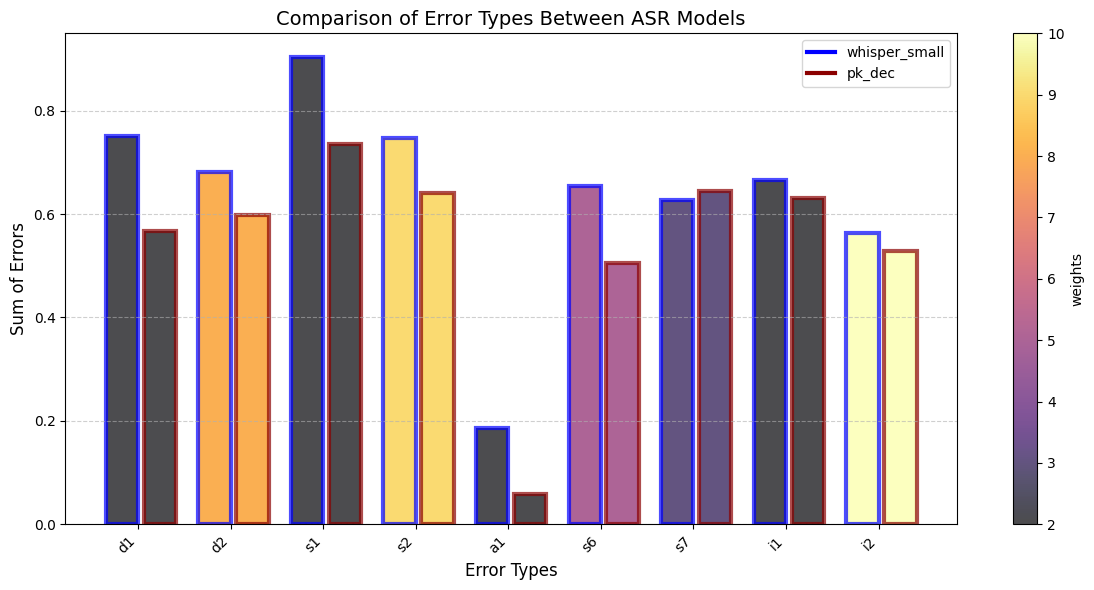

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization: Bar Plot
x = np.arange(len(error_types))
width = 0.35
lw = 3

# Normalize the weights to a range of 0 to 1 (for colormap)
norm = plt.Normalize(min(weights.values()), max(weights.values()))
colors = plt.cm.inferno(norm(list(weights.values())))  # "inferno" Colormap

epsilon = 0.06

# Erzeuge Figure und Axes
fig, ax = plt.subplots(figsize=(12, 6))

# Zeichne die Balken auf das Axes-Objekt
ax.bar(
    x - width/2,
    model_1_scores,
    width,
    label='Model 1',
    edgecolor='blue',
    linewidth=lw,
    alpha=0.7,
    color=colors
)

ax.bar(
    x + width/2 + epsilon,
    model_2_scores,
    width,
    label='Model 2',
    edgecolor='darkred',
    linewidth=lw,
    alpha=0.7,
    color=colors
)

# Erzeuge eine Colorbar und "binde" sie an die Achse ax
sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
sm.set_array([])  # benötigt für die Colorbar
cbar = fig.colorbar(sm, ax=ax, label='weights', alpha=0.7)

# Achsenbeschriftungen, Titel und Ticks
ax.set_xlabel('Error Types', fontsize=12)
ax.set_ylabel('Sum of Errors', fontsize=12)
ax.set_title('Comparison of Error Types Between ASR Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(error_types, rotation=45, ha='right', fontsize=10)

# Legend-Handles (nur Randfarbe sichtbar)
legend_handles = [
    plt.Line2D([0], [0], color='blue', linewidth=lw, label=label_model_1),
    plt.Line2D([0], [0], color='darkred', linewidth=lw, label=label_model_2)
]
ax.legend(handles=legend_handles)

# Layout anpassen und Gitter aktivieren
fig.tight_layout()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Plot anzeigen
plt.show()

In [46]:
model_1_scores

[np.float64(0.7509276100400146),
 np.float64(0.6816430388949473),
 np.float64(0.9042406669083002),
 np.float64(0.7472503617945008),
 np.float64(0.18681238615664844),
 np.float64(0.654032258064516),
 np.float64(0.6274495412844037),
 np.float64(0.6648550724637681),
 np.float64(0.5633030852994556)]

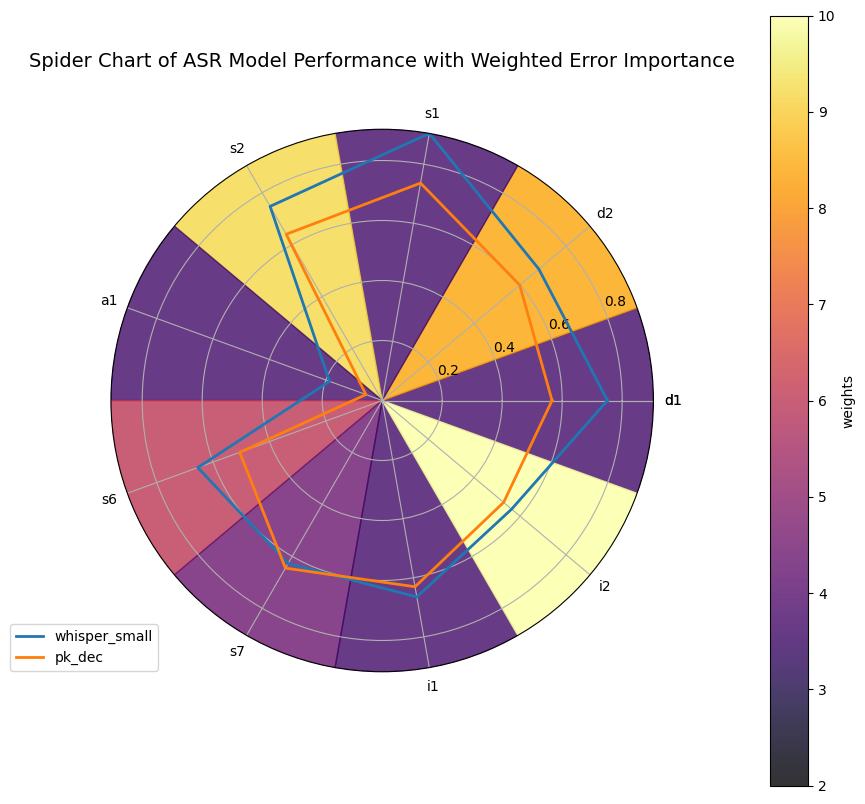

In [47]:
from math import pi
from matplotlib.patches import Rectangle
from math import degrees
# Adjusting for proper alignment between angles and categories
# Close the loop for angles and categories correctly

angles = [n / float(len(error_types)) * 2 * pi for n in range(len(error_types))]
angles += angles[:1]  # Close the loop for angles

categories = error_types + [error_types[0]]# Use all categories including the loop closure

model_1_scores_ = model_1_scores + [model_1_scores[0]]  # Closing the loop for spider chart
model_2_scores_ = model_2_scores + [model_2_scores[0]]
max_score = max(max(model_2_scores),max(model_1_scores))

# Normalize weights for background color intensity (0 to 1 scale)
normalized_weights = np.array(list(weights.values())) / max(weights.values())

# Initialize spider chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Background color based on weights
delta_angles = 1*(angles[2]-angles[1])*0.5
# for i in range(len(normalized_weights) - 1):  # Avoid closing loop element for background
#     ax.fill_between(
#         [angles[i]+delta_angles, angles[i + 1]+delta_angles],
#         0,
#         max_score,
#         color=plt.cm.inferno(normalized_weights[i]),
#         alpha=0.2,
#     )
# Draw wedges
for i in range(len(normalized_weights) ):
    # Calculate start and end angles in degrees
    start_angle = angles[i] - delta_angles
    end_angle = 2*delta_angles #angles[i + 1] #+ delta_angles
#     print(start_angle)
#     print(end_angle)
    # Create and add the wedge
    rect = Rectangle((start_angle, max_score), end_angle, max_score*(-1), color=plt.cm.inferno(normalized_weights[i]),alpha=0.8)
#     wedge = Wedge(
#         center=(0, 0),  # Center of the circle
#         r=10,  # Outer radius
#         theta1=0, #start_angle,  # Start angle in degrees
#         theta2=360, #end_angle,  # End angle in degrees
#         color=plt.cm.inferno(normalized_weights[i]),  # Fill color
#         alpha=0.2  # Transparency
#     )
    ax.add_patch(rect)
# ax.scatter(0,0)
ax.set_ylim(0, max_score)

# Add a colorbar to show the mapping
sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
sm.set_array([])
#plt.colorbar(sm, label='weights', pad=0.15, alpha=0.8)
fig.colorbar(sm, ax=ax, label='weights', pad=0.15, alpha=0.8)


# Plot data
ax.plot(angles, model_1_scores_, linewidth=2, linestyle='solid', label=label_model_1)
# ax.fill(angles, model_1_scores_, alpha=0.25)

ax.plot(angles, model_2_scores_, linewidth=2, linestyle='solid', label=label_model_2)
# ax.fill(angles, model_2_scores_, alpha=0.25)

# Add category labels
# ax.set_yticks([])  # Hide radial axis labels

ax.set_xticks(angles)  # Adjust for closing loop
ax.set_xticklabels(categories, fontsize=10, ha='center', va='center', rotation=45)

# Title and legend
plt.title("Spider Chart of ASR Model Performance with Weighted Error Importance", size=14, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


In [48]:
weights

{'d1': 2,
 'd2': 8,
 's1': 2,
 's2': 9,
 'a1': 2,
 's6': 5,
 's7': 3,
 'i1': 2,
 'i2': 10}

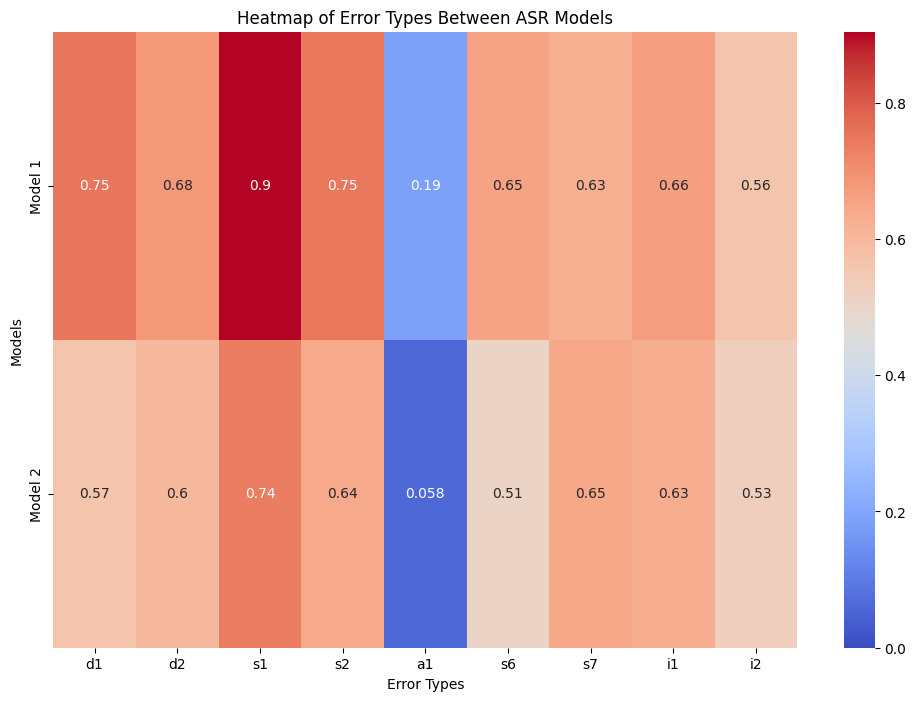

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data for both models into a single DataFrame
df_combined = pd.DataFrame({
    'Error Type': error_types,
    'Model 1': model_1_scores,
    'Model 2': model_2_scores
})

# Set 'Error Type' as the index
df_combined.set_index('Error Type', inplace=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.T, annot=True, cmap='coolwarm', vmin=0, vmax=df_combined.max().max())
plt.title('Heatmap of Error Types Between ASR Models')
plt.xlabel('Error Types')
plt.ylabel('Models')
plt.show()

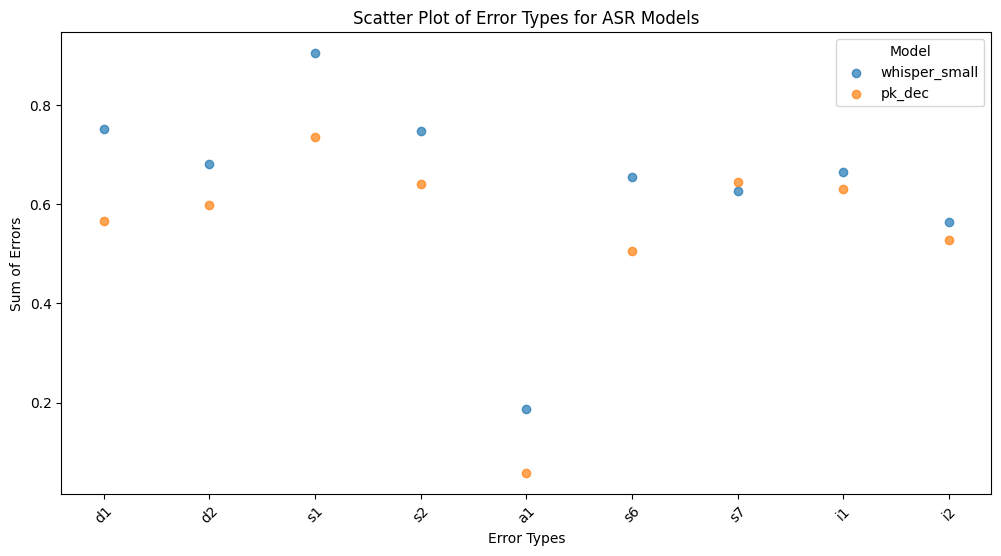

In [50]:
import matplotlib.pyplot as plt

# Combine the data for both models into a single DataFrame
df_combined = pd.DataFrame({
    'Error Type': error_types * 2,
    'Error Value': model_1_scores + model_2_scores,
    'Model': [label_model_1] * len(error_types) + [label_model_2] * len(error_types)
})

# Plot the scatter plot
plt.figure(figsize=(12, 6))
for model in df_combined['Model'].unique():
    subset = df_combined[df_combined['Model'] == model]
    plt.scatter(subset['Error Type'], subset['Error Value'], label=model, alpha=0.7)

plt.xlabel('Error Types')
plt.ylabel('Sum of Errors')
plt.title('Scatter Plot of Error Types for ASR Models')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.show()

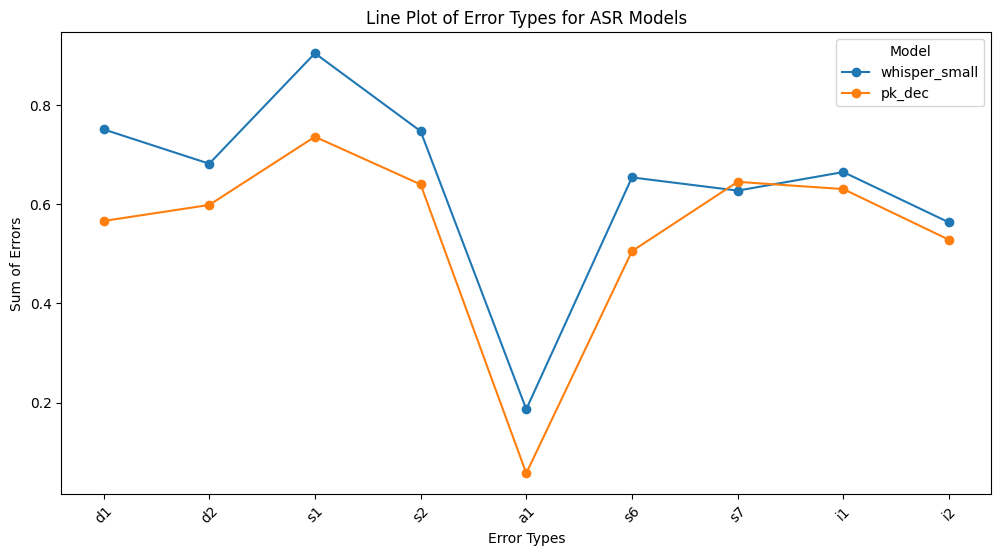

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(error_types, model_1_scores, marker='o', label=label_model_1)
plt.plot(error_types, model_2_scores, marker='o', label=label_model_2)
plt.xlabel('Error Types')
plt.ylabel('Sum of Errors')
plt.title('Line Plot of Error Types for ASR Models')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.show()

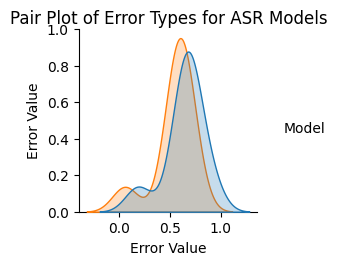

In [52]:
import seaborn as sns

# Combine the data for both models into a single DataFrame
df_combined = pd.DataFrame({
    'Error Type': error_types * 2,
    'Error Value': model_1_scores + model_2_scores,
    'Model': [label_model_1] * len(error_types) + [label_model_2] * len(error_types)
})

# Plot the pair plot
sns.pairplot(df_combined, hue='Model')
plt.suptitle('Pair Plot of Error Types for ASR Models', y=1.02)
plt.show()

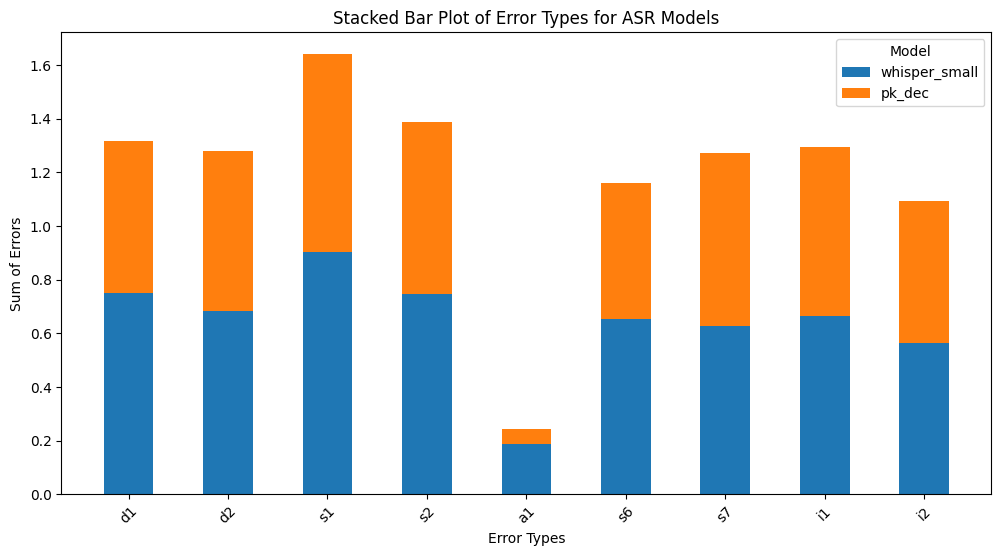

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Combine the data for both models into a single DataFrame
df_combined = pd.DataFrame({
    'Error Type': error_types,
    label_model_1: model_1_scores,
    label_model_2: model_2_scores
})

# Plot the stacked bar plot
x = np.arange(len(error_types))
width = 0.5

plt.figure(figsize=(12, 6))
plt.bar(x, df_combined[label_model_1], width, label=label_model_1)
plt.bar(x, df_combined[label_model_2], width, bottom=df_combined[label_model_1], label=label_model_2)
plt.xlabel('Error Types')
plt.ylabel('Sum of Errors')
plt.title('Stacked Bar Plot of Error Types for ASR Models')
plt.xticks(x, error_types, rotation=45)
plt.legend(title='Model')
plt.show()

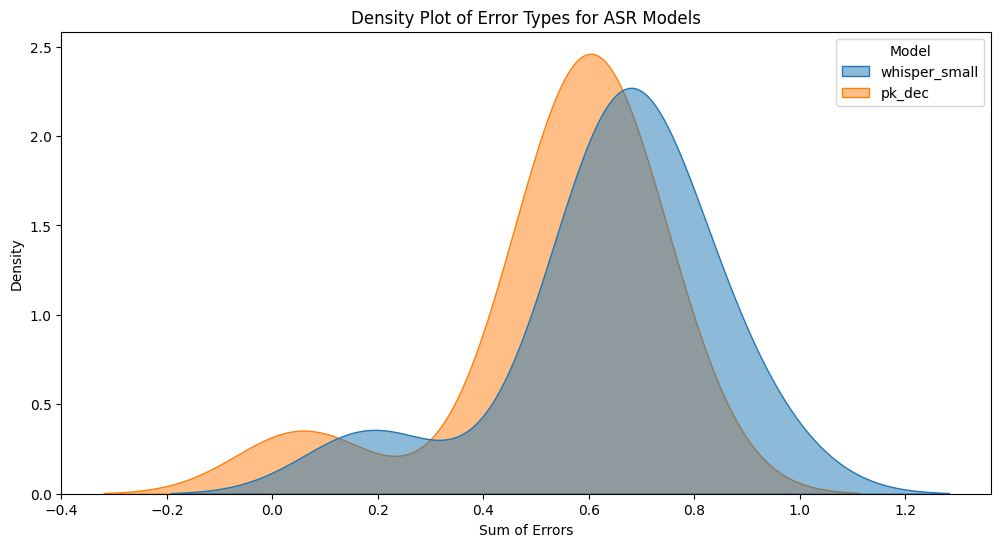

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data for both models into a single DataFrame
df_combined = pd.DataFrame({
    'Error Type': error_types * 2,
    'Error Value': model_1_scores + model_2_scores,
    'Model': [label_model_1] * len(error_types) + [label_model_2] * len(error_types)
})

# Plot the density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_combined, x='Error Value', hue='Model', fill=True, common_norm=False, alpha=0.5)
plt.xlabel('Sum of Errors')
plt.ylabel('Density')
plt.title('Density Plot of Error Types for ASR Models')
plt.show()

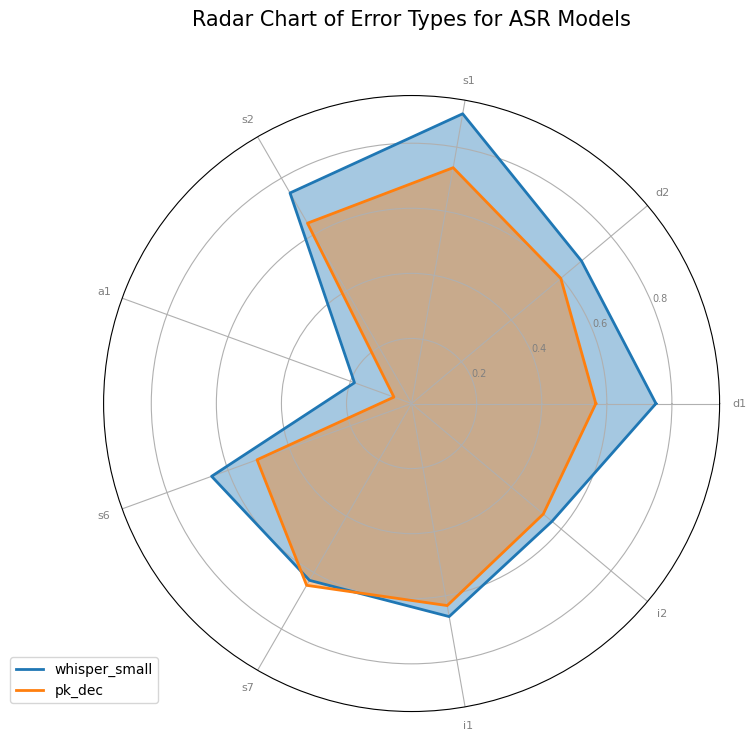

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Combine the data for both models into a single DataFrame
df_combined = pd.DataFrame({
    'Error Type': error_types,
    label_model_1: model_1_scores,
    label_model_2: model_2_scores
})

# Number of variables
categories = list(df_combined['Error Type'])
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variables)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# First model
values = df_combined[label_model_1].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label=label_model_1)
ax.fill(angles, values, alpha=0.4)

# Second model
values = df_combined[label_model_2].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label=label_model_2)
ax.fill(angles, values, alpha=0.4)

# Add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
plt.yticks(color='grey', size=7)
plt.title('Radar Chart of Error Types for ASR Models', size=15, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

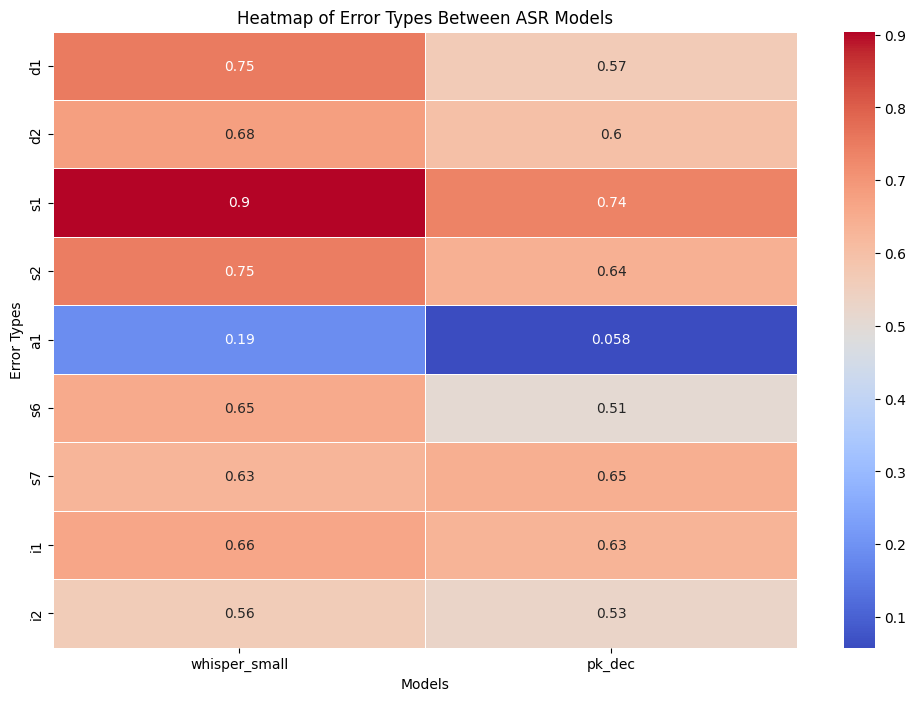

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data for both models into a single DataFrame
df_combined = pd.DataFrame({
    'Error Type': error_types,
    label_model_1: model_1_scores,
    label_model_2: model_2_scores
})

# Set 'Error Type' as the index
df_combined.set_index('Error Type', inplace=True)

# Plot the heatmap with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Error Types Between ASR Models')
plt.xlabel('Models')
plt.ylabel('Error Types')
plt.show()

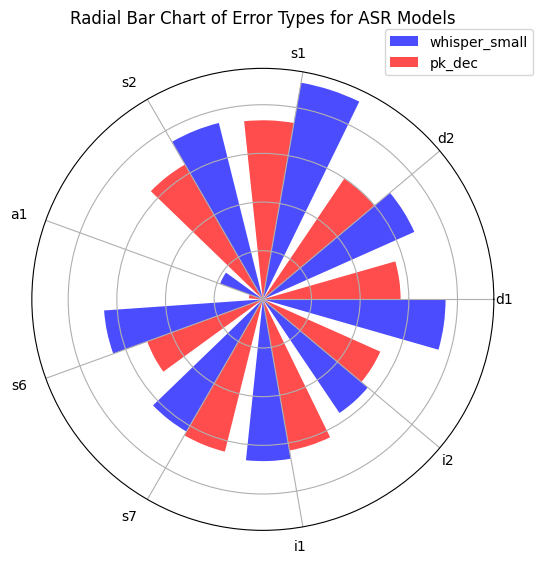

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Beispiel-Daten (passen Sie Fehlerarten und Score-Variablen an)
df_radial = pd.DataFrame({
    'Error Type': error_types,
    label_model_1: model_1_scores,
    label_model_2: model_2_scores
})

# Anzahl der Error Types
N = len(df_radial)
# Winkel gleichmäßig über 0 bis 2π verteilen
theta = np.linspace(0, 2*np.pi, N, endpoint=False)

# Breite für jeden Balken festlegen (z.B. 40% des Segments)
width = (2*np.pi / N) * 0.4

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

# Plot für Model 1
bars1 = ax.bar(
    theta - width/2,                   # Leicht nach links versetzt
    df_radial[label_model_1],
    width=width,
    alpha=0.7,
    color='blue',
    label=label_model_1
)

# Plot für Model 2
bars2 = ax.bar(
    theta + width/2,                   # Leicht nach rechts versetzt
    df_radial[label_model_2],
    width=width,
    alpha=0.7,
    color='red',
    label=label_model_2
)

# Setze die Positionen und Labels auf dem Polar-Achsen
ax.set_xticks(theta)
ax.set_xticklabels(df_radial['Error Type'], rotation=45, ha='right')

ax.set_yticklabels([])
ax.set_title('Radial Bar Chart of Error Types for ASR Models', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

/var/folders/mg/pmqwc7qx23b0bppw1k_4430w0000gq/T/ipykernel_10694/1100899614.py:76: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



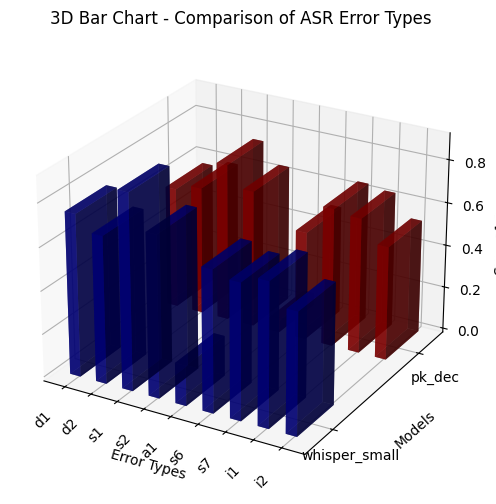

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Beispiel: 3D-Bar-Chart, um die Unterschiede zwischen zwei ASR-Modellen detailliert darzustellen

# Erstelle ein DataFrame oder arbeite direkt mit Arrays/Listern
# Wir gehen davon aus, dass Sie Folgendes bereits in Ihrem Workspace definiert haben:
# error_types: Liste von Fehlerarten (Strings)
# model_1_scores: Scores für Modell 1
# model_2_scores: Scores für Modell 2
# label_model_1, label_model_2: Namen der beiden Modelle

# Anzahl der Error Types
n = len(error_types)
x = np.arange(n)  # x-Positionen für die Kategorien (Error Types)

# Wir legen zwei y-Werte für die Modelle fest (0 und 1)
y_model_1 = np.zeros(n)    # y=0 für Modell 1
y_model_2 = np.ones(n)     # y=1 für Modell 2

# Höhe (dz) = Score
z_model_1 = model_1_scores
z_model_2 = model_2_scores

# 3D-Plot vorbereiten
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Balken-Dimension für x und y
dx = 0.4
dy = 0.4

# Plot für Modell 1
for i in range(n):
    ax.bar3d(
        x[i],              # x-Start
        y_model_1[i],      # y-Start
        0,                 # z-Start (Basis)
        dx,                # Breite in x-Richtung
        dy,                # Breite in y-Richtung
        z_model_1[i],      # Höhe (Score)
        color='navy',
        alpha=0.7
    )

# Plot für Modell 2
for i in range(n):
    ax.bar3d(
        x[i],              # x-Start
        y_model_2[i],      # y-Start
        0,                 # z-Start (Basis)
        dx,                # Breite in x-Richtung
        dy,                # Breite in y-Richtung
        z_model_2[i],      # Höhe (Score)
        color='darkred',
        alpha=0.7
    )

# Achsen beschriften und Ticks setzen
ax.set_xlabel('Error Types')
ax.set_ylabel('Models')
ax.set_zlabel('Sum of Errors')
ax.set_title('3D Bar Chart - Comparison of ASR Error Types')

ax.set_xticks(x + dx/2)
ax.set_xticklabels(error_types, rotation=45, ha='right')

# Y-Achse so platzieren, dass man die Modelle unterscheiden kann (0 und 1)
ax.set_yticks([0 + dy/2, 1 + dy/2])
ax.set_yticklabels([label_model_1, label_model_2])

# Optional: Betrachterwinkel anpassen
ax.view_init(elev=25, azim=-60)

plt.tight_layout()
plt.show()

/var/folders/mg/pmqwc7qx23b0bppw1k_4430w0000gq/T/ipykernel_10694/116998835.py:50: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



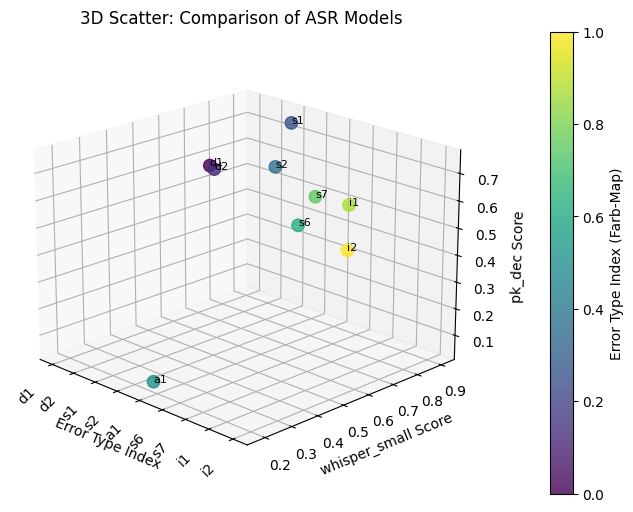

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Wir gehen davon aus, dass folgende Variablen bekannt sind:
# error_types: Liste von Fehlerarten (Strings)
# model_1_scores: Scores (Liste/Array) für Modell 1
# model_2_scores: Scores (Liste/Array) für Modell 2
# label_model_1, label_model_2: Bezeichnungen der Modelle

# Anzahl der Error Types
n = len(error_types)

# x ist der Index für Error Types
x = np.arange(n)

# y und z entsprechen den jeweiligen Modell-Scores
y = model_1_scores
z = model_2_scores

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 3D-Scatter-Plot
# Wir färben jeden Punkt anders, damit sie deutlicher hervortreten.
colors = np.linspace(0, 1, n)
scatter = ax.scatter(x, y, z, c=colors, cmap='viridis', s=80, alpha=0.8)

# Achsen beschriften
ax.set_xlabel('Error Type Index')
ax.set_ylabel(f'{label_model_1} Score')
ax.set_zlabel(f'{label_model_2} Score')
ax.set_title('3D Scatter: Comparison of ASR Models')

# Ticks & Labels für die x-Achse auf die Fehlerarten setzen
ax.set_xticks(x)
ax.set_xticklabels(error_types, rotation=45, ha='right')

# Optional: Punkte beschriften (Error Types) - kann bei vielen Kategorien unübersichtlich werden
for i in range(n):
    ax.text(x[i], y[i], z[i], error_types[i], size=8, color='black')

# Blickwinkel anpassen (optional)
ax.view_init(elev=20, azim=-45)

# Farbleiste hinzufügen
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label('Error Type Index (Farb-Map)')

plt.tight_layout()
plt.show()

/var/folders/mg/pmqwc7qx23b0bppw1k_4430w0000gq/T/ipykernel_10694/2812712370.py:55: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



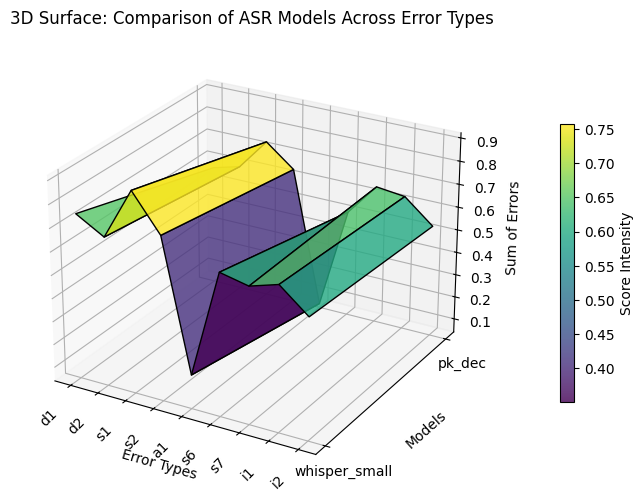

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Wir gehen davon aus, dass folgende Variablen schon in Ihrem Notebook definiert sind:
# error_types: Liste mit den Kategorien, z.B. ["Error1", "Error2", ...]
# model_1_scores: Scores (Liste/Array) für Modell 1
# model_2_scores: Scores (Liste/Array) für Modell 2
# label_model_1 und label_model_2: Bezeichnungen für die Modelle

n = len(error_types)

# X-Achse: Index für die Fehlerarten
x_range = np.arange(n)

# Y-Achse: Zwei 'Model-Indices' (0 = Modell1, 1 = Modell2)
y_range = np.array([0, 1])

# Erstelle ein Meshgrid für das Surface (2 x n)
X, Y = np.meshgrid(x_range, y_range)  # X.shape=(2,n), Y.shape=(2,n)

# Z-Werte in gleicher Dimension (2 x n)
Z = np.zeros_like(X, dtype=float)
for i in range(n):
    Z[0, i] = model_1_scores[i]  # Modell 1
    Z[1, i] = model_2_scores[i]  # Modell 2

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface-Plot
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Achsenbeschriftungen
ax.set_xlabel('Error Types')
ax.set_ylabel('Models')
ax.set_zlabel('Sum of Errors')
ax.set_title('3D Surface: Comparison of ASR Models Across Error Types')

# X-Ticks: Fehlerarten
ax.set_xticks(x_range)
ax.set_xticklabels(error_types, rotation=45, ha='right')

# Y-Ticks: Modelle
ax.set_yticks([0, 1])
ax.set_yticklabels([label_model_1, label_model_2])

# Farbleiste für die Werte
cbar = plt.colorbar(surface, shrink=0.6, pad=0.1)
cbar.set_label('Score Intensity')

# Leichtes Anpassen des Betrachtungswinkels
ax.view_init(elev=25, azim=-60)

plt.tight_layout()
plt.show()

/var/folders/mg/pmqwc7qx23b0bppw1k_4430w0000gq/T/ipykernel_10694/936390025.py:60: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



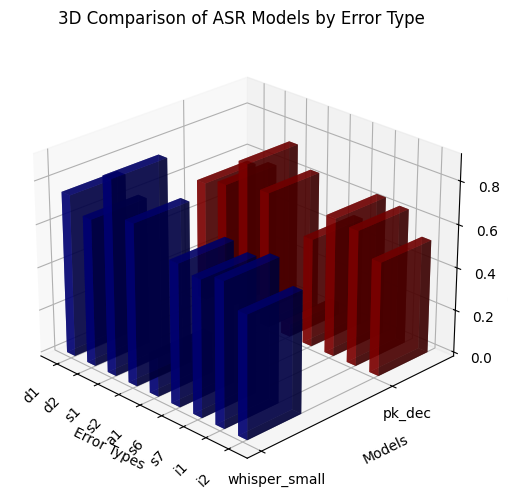

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Wir nehmen an, dass Sie bereits folgende Variablen definiert haben:
# error_types: Liste mit den Kategorien, z.B. ["Error1", "Error2", ...]
# model_1_scores: Scores (Liste/Array) für Modell 1
# model_2_scores: Scores (Liste/Array) für Modell 2
# label_model_1 und label_model_2: Labels (Strings) für die beiden Modelle

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x_positions = np.arange(len(error_types))  # x-Koordinaten für die einzelnen Error Types
y_positions = [0, 1]                       # y-Koordinaten: 0 = Modell1, 1 = Modell2

dx = 0.4  # Balkenbreite in x-Richtung
dy = 0.4  # Balkenbreite in y-Richtung

for i, etype in enumerate(error_types):
    # 3D-Balken für Modell 1
    ax.bar3d(
        x_positions[i],  # Start in x
        y_positions[0],  # Start in y
        0,               # Basis-Höhe
        dx,
        dy,
        model_1_scores[i],   # Höhe = Score von Modell 1
        color='navy',
        alpha=0.7
    )
    # 3D-Balken für Modell 2
    ax.bar3d(
        x_positions[i],  
        y_positions[1],
        0,
        dx,
        dy,
        model_2_scores[i],   # Höhe = Score von Modell 2
        color='darkred',
        alpha=0.7
    )

# X-Achse: Error Types
ax.set_xticks(x_positions + dx/2)
ax.set_xticklabels(error_types, rotation=45, ha='right')
ax.set_xlabel('Error Types')

# Y-Achse: Modelle
ax.set_yticks(y_positions)
ax.set_yticklabels([label_model_1, label_model_2])
ax.set_ylabel('Models')

# Z-Achse
ax.set_zlabel('Sum of Errors')

ax.set_title('3D Comparison of ASR Models by Error Type')
ax.view_init(elev=25, azim=-45)

plt.tight_layout()
plt.show()

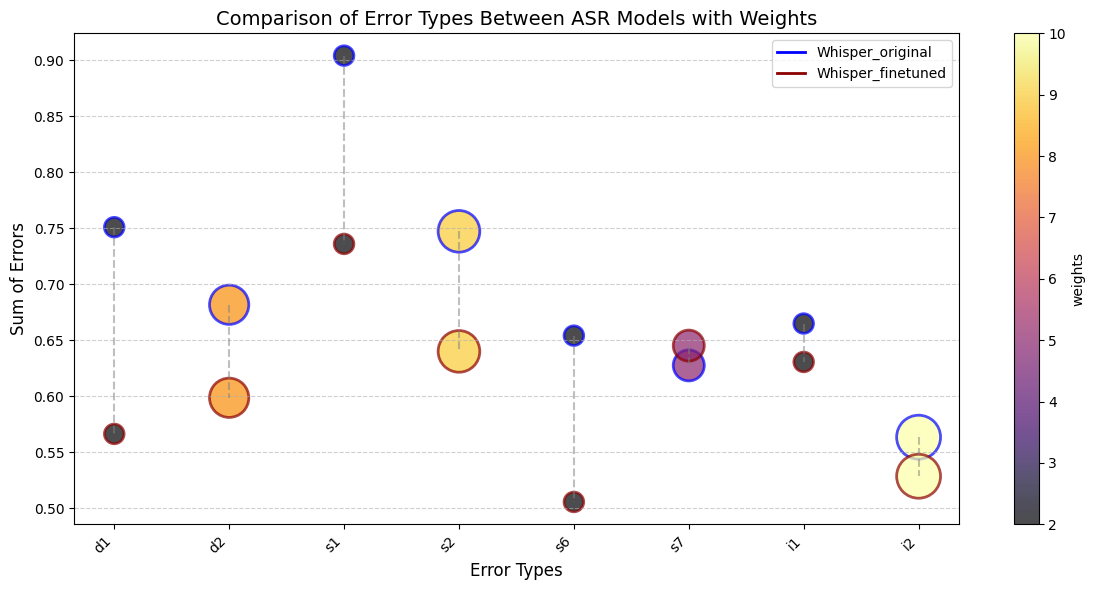

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Korrigiere: 'a1' existiert nicht in df_error_types['tag'], daher filtern wir error_types so,
# dass nur Tags verwendet werden, die auch im DataFrame vorhanden sind:
error_types_filtered = [et for et in error_types if et in df_error_types['tag'].unique()]

label_model_1 = "Whisper_original"
label_model_2 = "Whisper_finetuned"

df_error_types['Relevanz'] = pd.to_numeric(df_error_types['Relevanz'], errors='coerce')
weights_dict = df_error_types.set_index('tag')['Relevanz'].to_dict()

weight_values = [weights_dict[et] for et in error_types_filtered]

x_vals = np.arange(len(error_types_filtered))
y_model_1 = np.array([model_1_scores[error_types.index(et)] for et in error_types_filtered])
y_model_2 = np.array([model_2_scores[error_types.index(et)] for et in error_types_filtered])

norm = plt.Normalize(min(weight_values), max(weight_values))
colors = plt.cm.inferno(norm(weight_values))

fig, ax = plt.subplots(figsize=(12, 6))

sizes = np.array(weight_values) * 100

scatter1 = ax.scatter(x_vals, y_model_1, s=sizes, c=colors,
                      label=label_model_1, alpha=0.7, edgecolor='blue', linewidth=2)

scatter2 = ax.scatter(x_vals, y_model_2, s=sizes, c=colors,
                      label=label_model_2, alpha=0.7, edgecolor='darkred', linewidth=2)

for i in range(len(error_types_filtered)):
    ax.plot([x_vals[i], x_vals[i]], [y_model_1[i], y_model_2[i]],
            color='gray', linestyle='--', alpha=0.5)

sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='weights', alpha=0.7)

ax.set_xlabel('Error Types', fontsize=12)
ax.set_ylabel('Sum of Errors', fontsize=12)
ax.set_title('Comparison of Error Types Between ASR Models with Weights', fontsize=14)
ax.set_xticks(x_vals)
ax.set_xticklabels(error_types_filtered, rotation=45, ha='right', fontsize=10)

legend_handles = [
    plt.Line2D([0], [0], color='blue', linewidth=2, label=label_model_1),
    plt.Line2D([0], [0], color='darkred', linewidth=2, label=label_model_2)
]
ax.legend(handles=legend_handles)

fig.tight_layout()
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



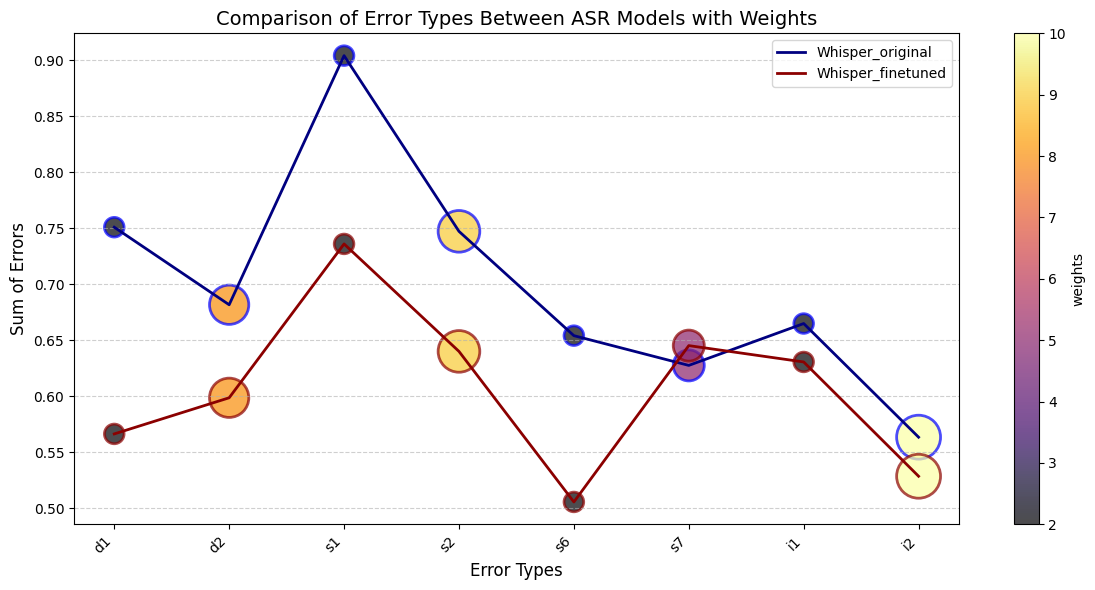

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter, sodass nur Tags verwendet werden, die tatsächlich in df_error_types stehen
error_types_filtered = [et for et in error_types if et in df_error_types['tag'].unique()]

# Relevanz in float konvertieren
df_error_types['Relevanz'] = pd.to_numeric(df_error_types['Relevanz'], errors='coerce')
weights_dict = df_error_types.set_index('tag')['Relevanz'].to_dict()

# Erzeuge die Gewichtswerte in Reihenfolge der gefilterten error_types
weight_values_filtered = [weights_dict[et] for et in error_types_filtered]

# X-Achse und Y-Werte an die gefilterte Länge anpassen
x_vals = np.arange(len(error_types_filtered))

# Y-Werte passend filtern (hier wird angenommen, dass model_1_scores / model_2_scores
# in derselben Reihenfolge stehen wie error_types – ggf. anpassen, falls unterschiedliche Reihenfolgen)
model_1_dict = dict(zip(error_types, model_1_scores))
model_2_dict = dict(zip(error_types, model_2_scores))
y_model_1_filtered = np.array([model_1_dict[et] for et in error_types_filtered])
y_model_2_filtered = np.array([model_2_dict[et] for et in error_types_filtered])

# Normalisierung für die Farbskala
norm = plt.Normalize(min(weight_values_filtered), max(weight_values_filtered))
colors = plt.cm.inferno(norm(weight_values_filtered))

fig, ax = plt.subplots(figsize=(12, 6))

# Punktgrößen
sizes = np.array(weight_values_filtered) * 100

# Linienplots
ax.plot(x_vals, y_model_1_filtered, color='navy', linewidth=2, label=label_model_1)
ax.plot(x_vals, y_model_2_filtered, color='darkred', linewidth=2, label=label_model_2)

# Scatterplots
scatter1 = ax.scatter(x_vals, y_model_1_filtered, s=sizes, c=colors,
                      alpha=0.7, edgecolor='blue', linewidth=2, label=label_model_1)
scatter2 = ax.scatter(x_vals, y_model_2_filtered, s=sizes, c=colors,
                      alpha=0.7, edgecolor='darkred', linewidth=2, label=label_model_2)

# Colorbar
sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='weights', alpha=0.7)

ax.set_xlabel('Error Types', fontsize=12)
ax.set_ylabel('Sum of Errors', fontsize=12)
ax.set_title('Comparison of Error Types Between ASR Models with Weights', fontsize=14)
ax.set_xticks(x_vals)
ax.set_xticklabels(error_types_filtered, rotation=45, ha='right', fontsize=10)

legend_handles = [
    plt.Line2D([0], [0], color='navy', linewidth=2, label=label_model_1),
    plt.Line2D([0], [0], color='darkred', linewidth=2, label=label_model_2)
]
ax.legend(handles=legend_handles)

fig.tight_layout()
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



In [69]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, ColorBar, LinearColorMapper
from bokeh.transform import linear_cmap
from bokeh.layouts import gridplot

import numpy as np

output_notebook()

# Filter error_types so we only keep keys that exist in error_weights
filtered_error_types = [et for et in error_types if et in error_weights]

# Neue Länge und X-Achse
n = len(filtered_error_types)
x_vals = np.arange(n)

# Y-Werte passend zur gefilterten Liste ermitteln
# (Wir gehen davon aus, dass model_1_scores/model_2_scores in derselben Reihenfolge stehen wie error_types)
y_model_1 = np.array([model_1_scores[error_types.index(et)] for et in filtered_error_types])
y_model_2 = np.array([model_2_scores[error_types.index(et)] for et in filtered_error_types])

# Gewichtungen passend zur gefilterten Liste
weights = np.array([error_weights[et] for et in filtered_error_types])

source = ColumnDataSource(data=dict(
    x=x_vals,
    y_model_1=y_model_1,
    y_model_2=y_model_2,
    weights=weights
))

mapper = LinearColorMapper(palette='Inferno256', low=min(weights), high=max(weights))

p1 = figure(title=label_model_1, x_axis_label='Error Types', y_axis_label='Sum of Errors')
p1.circle('x', 'y_model_1', size='weights', 
          color={'field': 'weights', 'transform': mapper}, 
          source=source, legend_label=label_model_1)

p2 = figure(title=label_model_2, x_axis_label='Error Types', y_axis_label='Sum of Errors')
p2.circle('x', 'y_model_2', size='weights', 
          color={'field': 'weights', 'transform': mapper}, 
          source=source, legend_label=label_model_2)

color_bar = ColorBar(color_mapper=mapper, location=(0, 0))
p1.add_layout(color_bar, 'right')
p2.add_layout(color_bar, 'right')

show(gridplot([[p1, p2]]))


Loading BokehJS ...

In [71]:
import altair as alt
import pandas as pd
import numpy as np

# Filter `error_types` to keep only those available in `error_weights`
filtered_error_types = [et for et in error_types if et in error_weights]

# Create aligned score arrays for the filtered error types
y_model_1_filtered = [model_1_scores[error_types.index(et)] for et in filtered_error_types]
y_model_2_filtered = [model_2_scores[error_types.index(et)] for et in filtered_error_types]

n = len(filtered_error_types)

# Build matching weights array for the filtered types
weights_filtered = [error_weights[et] for et in filtered_error_types]

data = pd.DataFrame({
    'Error Types': np.tile(filtered_error_types, 2),
    'Sum of Errors': np.concatenate([y_model_1_filtered, y_model_2_filtered]),
    'Model': [label_model_1] * n + [label_model_2] * n,
    'Weights': np.tile(weights_filtered, 2)
})

chart = alt.Chart(data).mark_circle().encode(
    x='Error Types',
    y='Sum of Errors',
    size='Weights',
    color='Weights',
    tooltip=['Error Types', 'Sum of Errors', 'Model', 'Weights']
).properties(
    title='Comparison of Error Types Between ASR Models with Weights'
).facet(
    column='Model'
)

chart.show()


alt.FacetChart(...)

In [73]:
import altair as alt
import pandas as pd
import numpy as np

# Filter out error_types that aren't present in error_weights
filtered_error_types = [et for et in error_types if et in error_weights]

# Align scores with the filtered error_types
y_model_1_filtered = [model_1_scores[error_types.index(et)] for et in filtered_error_types]
y_model_2_filtered = [model_2_scores[error_types.index(et)] for et in filtered_error_types]

# Create the filtered weights array
weights_filtered = [error_weights[et] for et in filtered_error_types]

# Create a DataFrame for Altair
n = len(filtered_error_types)
data = pd.DataFrame({
    'Error Types': np.tile(filtered_error_types, 2),
    'Sum of Errors': np.concatenate([y_model_1_filtered, y_model_2_filtered]),
    'Model': [label_model_1] * n + [label_model_2] * n,
    'Weights': np.tile(weights_filtered, 2)
})

chart = alt.Chart(data).mark_circle().encode(
    x='Error Types',
    y='Sum of Errors',
    size='Weights',
    color='Model',
    shape='Model',
    tooltip=['Error Types', 'Sum of Errors', 'Model', 'Weights']
).properties(
    title='Comparison of Error Types Between ASR Models with Weights'
)

chart.show()


alt.Chart(...)

In [76]:
import altair as alt
import pandas as pd
import numpy as np

# Filter out error_types that don't exist in error_weights
filtered_error_types = [et for et in error_types if et in error_weights]

# Align model scores with the filtered error types
y_model_1_filtered = [model_1_scores[error_types.index(et)] for et in filtered_error_types]
y_model_2_filtered = [model_2_scores[error_types.index(et)] for et in filtered_error_types]

# Build the filtered weights array
weights_filtered = [error_weights[et] for et in filtered_error_types]

n = len(filtered_error_types)

data = pd.DataFrame({
    'Error Types': np.tile(filtered_error_types, 2),
    'Sum of Errors': np.concatenate([y_model_1_filtered, y_model_2_filtered]),
    'Model': [label_model_1] * n + [label_model_2] * n,
    'Weights': np.tile(weights_filtered, 2)
})

chart = alt.Chart(data).mark_circle().encode(
    x=alt.X('Error Types', title='Error Types', 
            sort=filtered_error_types,      # Sort by the filtered list
            axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Sum of Errors', title='Sum of Errors'),
    size=alt.Size('Weights', title='Weights', scale=alt.Scale(range=[100, 1000])),
    color=alt.Color('Model', title='Model'),
    shape=alt.Shape('Model', title='Model'),
    tooltip=['Error Types', 'Sum of Errors', 'Model', 'Weights']
).properties(
    title='Comparison of Error Types Between ASR Models with Weights',
    width=800,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    labelFontSize=12,
    titleFontSize=14
)

chart.show()


alt.Chart(...)

In [78]:
import altair as alt
import pandas as pd
import numpy as np

# Filter out error_types that aren't in error_weights
filtered_error_types = [et for et in error_types if et in error_weights]

# Create aligned arrays for the filtered error types
y_model_1_filtered = [model_1_scores[error_types.index(et)] for et in filtered_error_types]
y_model_2_filtered = [model_2_scores[error_types.index(et)] for et in filtered_error_types]
weights_filtered = [error_weights[et] for et in filtered_error_types]

n = len(filtered_error_types)

# Build DataFrame for Altair
data = pd.DataFrame({
    'Error Types': np.tile(filtered_error_types, 2),
    'Sum of Errors': np.concatenate([y_model_1_filtered, y_model_2_filtered]),
    'Model': [label_model_1] * n + [label_model_2] * n,
    'Weights': np.tile(weights_filtered, 2)
})

line_chart = alt.Chart(data).mark_line(point=True).encode(
    x=alt.X('Error Types:N', title='Error Types', sort=filtered_error_types, axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Sum of Errors:Q', title='Sum of Errors'),
    color=alt.Color('Model:N', title='Model'),
    tooltip=['Error Types', 'Sum of Errors', 'Model', 'Weights']
).properties(
    title='Line Chart: Comparison of Error Types Between ASR Models',
    width=800,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    labelFontSize=12,
    titleFontSize=14
)

line_chart.show()


alt.Chart(...)

In [80]:
import altair as alt
import pandas as pd
import numpy as np

# Filter out error_types that aren't present in error_weights
filtered_error_types = [et for et in error_types if et in error_weights]

# Create aligned arrays for the filtered list
y_model_1_filtered = [model_1_scores[error_types.index(et)] for et in filtered_error_types]
y_model_2_filtered = [model_2_scores[error_types.index(et)] for et in filtered_error_types]
weights_filtered = [error_weights[et] for et in filtered_error_types]

n = len(filtered_error_types)

# Build DataFrame for Altair
data = pd.DataFrame({
    'Error Types': np.tile(filtered_error_types, 2),
    'Sum of Errors': np.concatenate([y_model_1_filtered, y_model_2_filtered]),
    'Model': [label_model_1] * n + [label_model_2] * n,
    'Weights': np.tile(weights_filtered, 2)
})

line_chart = alt.Chart(data).mark_line(point=True).encode(
    x=alt.X('Error Types:N', 
            title='Error Types', 
            sort=filtered_error_types, 
            axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Sum of Errors:Q', title='Sum of Errors'),
    color=alt.Color('Model:N', title='Model'),
    tooltip=['Error Types', 'Sum of Errors', 'Model', 'Weights']
).properties(
    title='Line Chart: Comparison of Error Types Between ASR Models',
    width=800,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    labelFontSize=12,
    titleFontSize=14
)

line_chart.show()


alt.Chart(...)

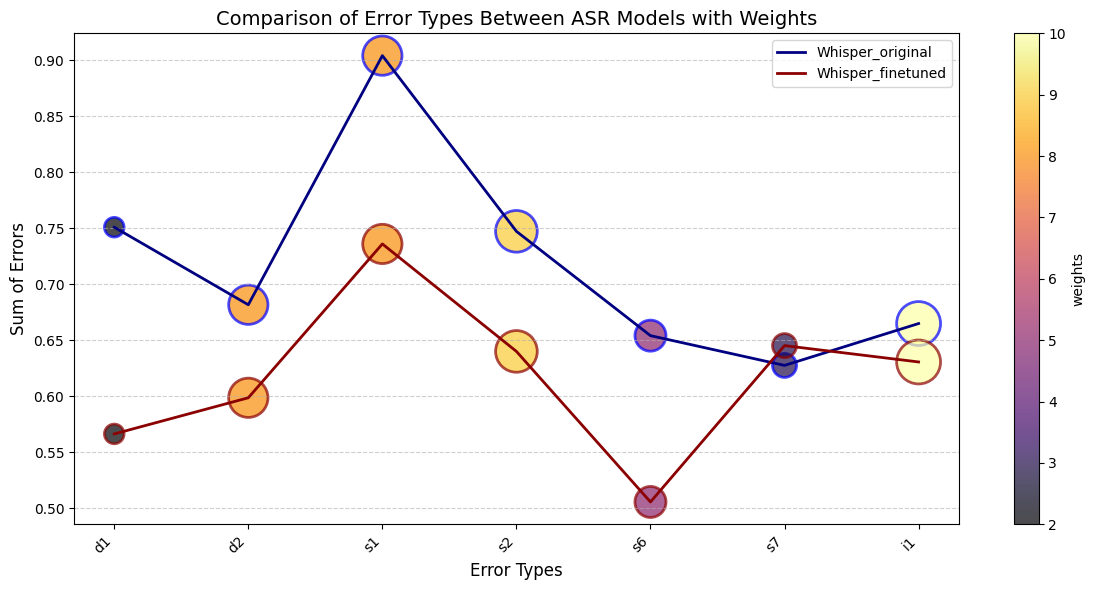

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out error_types that don't exist in error_weights
filtered_error_types = [et for et in error_types if et in error_weights]

# Neue Länge nach dem Filtern
n = len(filtered_error_types)
x_vals = np.arange(n)

# Passende Modell-Scores für die gefilterten Fehler-Typen
y_model_1_filtered = [model_1_scores[error_types.index(et)] for et in filtered_error_types]
y_model_2_filtered = [model_2_scores[error_types.index(et)] for et in filtered_error_types]

# Gewichte passend zu den gefilterten Fehlern
weights_filtered = [error_weights[et] for et in filtered_error_types]

# Normalize (Colormap)
norm = plt.Normalize(min(weights_filtered), max(weights_filtered))
colors = plt.cm.inferno(norm(weights_filtered))

fig, ax = plt.subplots(figsize=(12, 6))

# Linienplots
ax.plot(x_vals, y_model_1_filtered, color='navy', linewidth=2, label=label_model_1)
ax.plot(x_vals, y_model_2_filtered, color='darkred', linewidth=2, label=label_model_2)

# Scatterplots
scatter1 = ax.scatter(
    x_vals, y_model_1_filtered, 
    s=np.array(weights_filtered) * 100, 
    c=colors, alpha=0.7, edgecolor='blue', linewidth=2
)
scatter2 = ax.scatter(
    x_vals, y_model_2_filtered, 
    s=np.array(weights_filtered) * 100, 
    c=colors, alpha=0.7, edgecolor='darkred', linewidth=2
)

# Colorbar
sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='weights', alpha=0.7)

ax.set_xlabel('Error Types', fontsize=12)
ax.set_ylabel('Sum of Errors', fontsize=12)
ax.set_title('Comparison of Error Types Between ASR Models with Weights', fontsize=14)
ax.set_xticks(x_vals)
ax.set_xticklabels(filtered_error_types, rotation=45, ha='right', fontsize=10)

legend_handles = [
    plt.Line2D([0], [0], color='navy', linewidth=2, label=label_model_1),
    plt.Line2D([0], [0], color='darkred', linewidth=2, label=label_model_2)
]
ax.legend(handles=legend_handles)

fig.tight_layout()
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


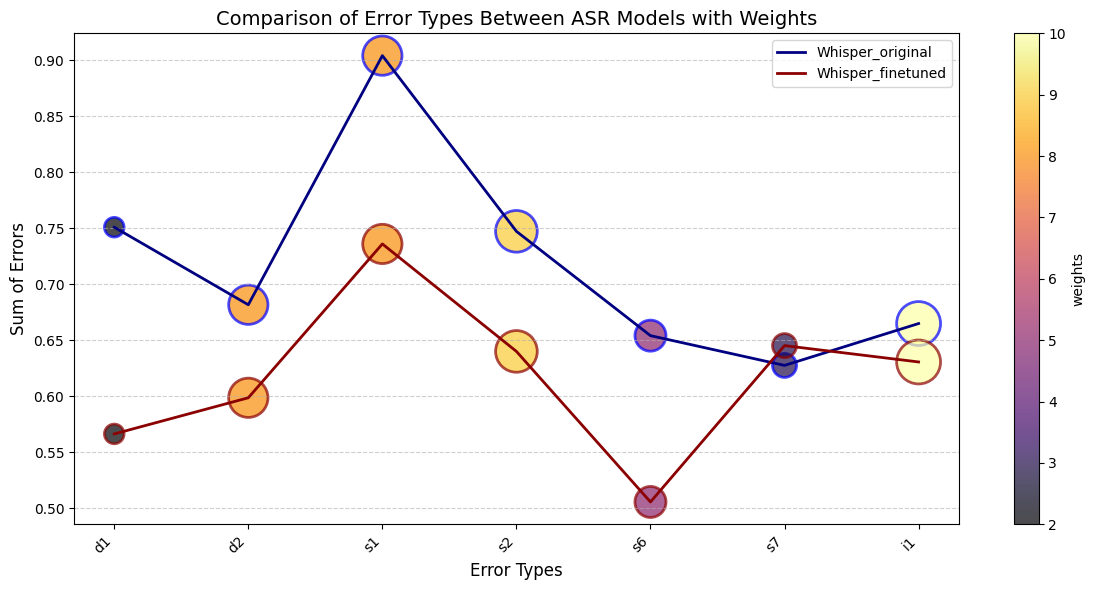

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Filter only the error types present in error_weights
filtered_error_types = [et for et in error_types if et in error_weights]

# Adjust lengths
n = len(filtered_error_types)
x_vals = np.arange(n)

# Filter model scores accordingly
y_model_1_filtered = [model_1_scores[error_types.index(et)] for et in filtered_error_types]
y_model_2_filtered = [model_2_scores[error_types.index(et)] for et in filtered_error_types]

# Filtered weights
weights_filtered = [error_weights[et] for et in filtered_error_types]

norm = plt.Normalize(min(weights_filtered), max(weights_filtered))
colors = plt.cm.inferno(norm(weights_filtered))

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x_vals, y_model_1_filtered, color='navy', linewidth=2, label=label_model_1)
ax.plot(x_vals, y_model_2_filtered, color='darkred', linewidth=2, label=label_model_2)

scatter1 = ax.scatter(
    x_vals, y_model_1_filtered, 
    s=np.array(weights_filtered)*100, 
    c=colors, alpha=0.7, edgecolor='blue', linewidth=2
)
scatter2 = ax.scatter(
    x_vals, y_model_2_filtered, 
    s=np.array(weights_filtered)*100, 
    c=colors, alpha=0.7, edgecolor='darkred', linewidth=2
)

sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='weights', alpha=0.7)

ax.set_xlabel('Error Types', fontsize=12)
ax.set_ylabel('Sum of Errors', fontsize=12)
ax.set_title('Comparison of Error Types Between ASR Models with Weights', fontsize=14)
ax.set_xticks(x_vals)
ax.set_xticklabels(filtered_error_types, rotation=45, ha='right', fontsize=10)

legend_handles = [
    plt.Line2D([0], [0], color='navy', linewidth=2, label=label_model_1),
    plt.Line2D([0], [0], color='darkred', linewidth=2, label=label_model_2)
]
ax.legend(handles=legend_handles)

fig.tight_layout()
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [85]:
import plotly.graph_objects as go
import numpy as np

# Annahmen:
error_types = ["d1", "d2", "d3", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "i1"]
#model_1_scores = [10, 20, 15, 10, 5, 25, 30, 20, 15, 10, 5, 10]
#model_2_scores = [15, 25, 10, 5, 20, 15, 10, 25, 30, 20, 15, 10]
#label_model_1 = "ASR Model A"
#label_model_2 = "ASR Model B"
#error_weights = {'d1': 2, 'd2': 8, 'd3': 8, 's1': 8, 's2': 9, 's3': 4, 's4': 2, 's5': 2, 's6': 5, 's7': 3, 's8': 1, 'i1': 10}

# Anzahl der Fehlerarten
n = len(error_types)

# Y-Werte: die Scores beider Modelle
y_model_1 = np.array(model_1_scores)
y_model_2 = np.array(model_2_scores)

# Gewichtungen der Fehlerarten
weights = np.array([error_weights[etype] for etype in error_types])

# Sankey-Diagramm erstellen
labels = [label_model_1, label_model_2] + error_types
source = [0] * n + [1] * n
target = list(range(2, 2 + n)) * 2
value = list(y_model_1) + list(y_model_2)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=80,
        line=dict(color="black", width=0.9),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.8)"] * n + ["rgba(255, 127, 14, 0.8)"] * n
    )
)])

fig.update_layout(title_text="Sankey Diagram: Comparison of Error Types Between ASR Models", font_size=10)
fig.show()

In [88]:
import pandas as pd
import holoviews as hv
from holoviews import opts
import hvplot.pandas

hv.extension('bokeh')

# Beispiel: statt index-basierter Listen nutzen wir Dictionaries, um Index-Fehler zu vermeiden
# Wir gehen davon aus, dass error_types, model_1_scores, model_2_scores mindestens gleich lang sind
# und in derselben Reihenfolge stehen.

# Erzeuge Dictionaries: { error_tag -> score }
model_1_dict = dict(zip(error_types, model_1_scores))
model_2_dict = dict(zip(error_types, model_2_scores))

# Falls Du error_weights nutzt, kannst Du hier ebenfalls filtern:
common_error_types = [et for et in error_types if et in error_weights and et in model_1_dict and et in model_2_dict]

model_1_filtered = [model_1_dict[et] for et in common_error_types]
model_2_filtered = [model_2_dict[et] for et in common_error_types]

# Gleiche Länge
n = len(common_error_types)

data = pd.DataFrame({
    'source': [label_model_1]*n + [label_model_2]*n,
    'target': common_error_types*2,
    'value': model_1_filtered + model_2_filtered
})

chord = hv.Chord(data)
chord.opts(
    opts.Chord(
        labels='index',
        node_color='index',
        edge_color='source',
        cmap='Category20',
        edge_cmap='Category20',
        edge_alpha=0.8,
        node_size=10,
        width=800,
        height=800,
        title='Chord Diagram: Comparison of Error Types Between ASR Models'
    )
)

chord




:Chord   [source,target]   (value)

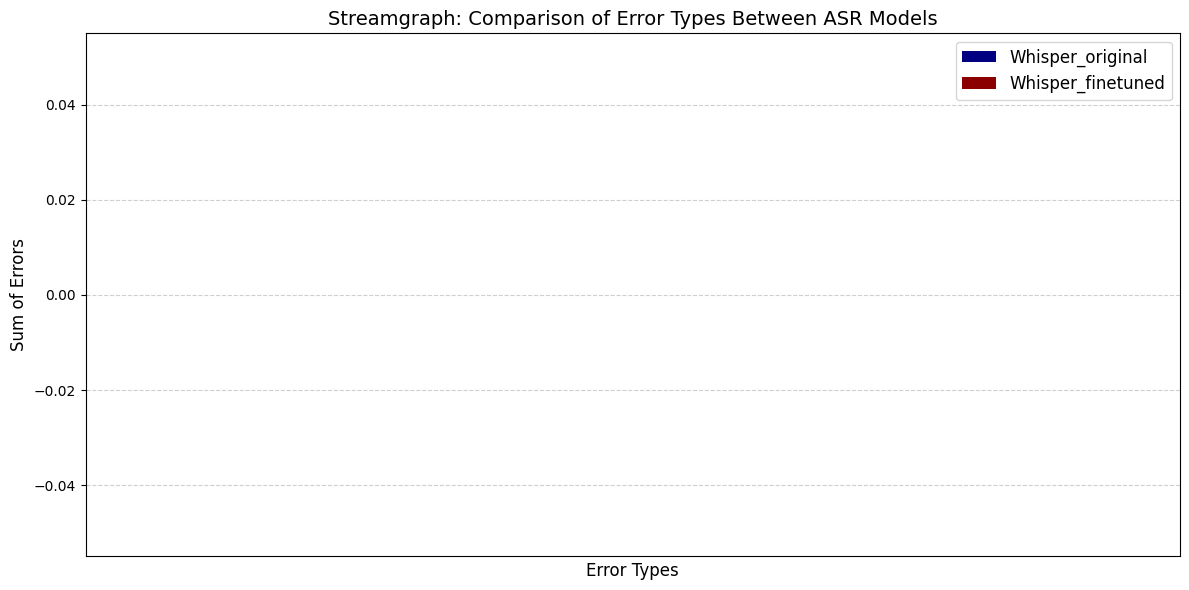

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filter error_types to include only those present in both model scores and error_weights
common_error_types = [et for et in error_types if et in weights and et in model_1_scores and et in model_2_scores]

# Map error types to their corresponding scores using dictionaries
model_1_dict = dict(zip(error_types, model_1_scores))
model_2_dict = dict(zip(error_types, model_2_scores))

# Filter model scores and weights based on the common error types
model_1_filtered = [model_1_dict.get(et, 0) for et in common_error_types]
model_2_filtered = [model_2_dict.get(et, 0) for et in common_error_types]
weights_filtered = [weights.get(et, 0) for et in common_error_types]

# Ensure all arrays have the same length
n = len(common_error_types)
if not (len(model_1_filtered) == len(model_2_filtered) == len(weights_filtered) == n):
    raise ValueError("Data mismatch: Check error_types, model scores, and error weights.")

# Prepare DataFrame
data = pd.DataFrame({
    'Error Types': np.tile(common_error_types, 2),
    'Sum of Errors': np.concatenate([model_1_filtered, model_2_filtered]),
    'Model': [label_model_1] * n + [label_model_2] * n,
    'Weights': np.tile(weights_filtered, 2)
})

# Prepare for streamgraph
stream_data = pd.DataFrame({
    'Error Types': common_error_types,
    label_model_1: model_1_filtered,
    label_model_2: model_2_filtered
})

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['navy', 'darkred']

ax.stackplot(
    np.arange(n),  # Use index values instead of categorical labels
    stream_data[label_model_1],
    stream_data[label_model_2],
    labels=[label_model_1, label_model_2],
    colors=colors
)

ax.set_xlabel('Error Types', fontsize=12)
ax.set_ylabel('Sum of Errors', fontsize=12)
ax.set_title('Streamgraph: Comparison of Error Types Between ASR Models', fontsize=14)
ax.legend(loc='upper right', fontsize=12)

ax.set_xticks(np.arange(n))
ax.set_xticklabels(common_error_types, rotation=45, ha='right', fontsize=10)

fig.tight_layout()
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


In [99]:
import plotly.express as px
import pandas as pd
import numpy as np

# Filter only error types that exist in both error_weights and model scores
common_error_types = [et for et in error_types if et in weights and et in model_1_scores and et in model_2_scores]

# Create dictionaries for scores
model_1_dict = dict(zip(error_types, model_1_scores))
model_2_dict = dict(zip(error_types, model_2_scores))

# Filter model scores and weights accordingly
model_1_filtered = [model_1_dict[et] for et in common_error_types]
model_2_filtered = [model_2_dict[et] for et in common_error_types]
weights_filtered = [weights[et] for et in common_error_types]

# Ensure all arrays have the same length
n = len(common_error_types)
if not (len(model_1_filtered) == len(model_2_filtered) == len(weights_filtered) == n):
    raise ValueError("Data mismatch: Check error_types, model scores, and error weights.")

# Prepare DataFrame
data = pd.DataFrame({
    'Error Types': np.tile(common_error_types, 2),
    'Sum of Errors': np.concatenate([model_1_filtered, model_2_filtered]),
    'Model': [label_model_1] * n + [label_model_2] * n,
    'Weights': np.tile(weights_filtered, 2)
})

# Sunburst Chart erstellen
fig = px.sunburst(
    data,
    path=['Model', 'Error Types'],
    values='Sum of Errors',
    color='Model',
    color_discrete_map={label_model_1: 'navy', label_model_2: 'darkred'},
    title='Sunburst Chart: Comparison of Error Types Between ASR Models'
)

fig.update_layout(
    font_size=10
)

fig.show()


In [96]:
import plotly.express as px
import pandas as pd
import numpy as np

# Annahmen:
#error_types = ["d1", "d2", "d3", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "i1"]
#model_1_scores = [10, 20, 15, 10, 5, 25, 30, 20, 15, 10, 5, 10]
#model_2_scores = [15, 25, 10, 5, 20, 15, 10, 25, 30, 20, 15, 10]
#label_model_1 = "ASR Model A"
#label_model_2 = "ASR Model B"
#error_weights = {'d1': 2, 'd2': 8, 'd3': 8, 's1': 8, 's2': 9, 's3': 4, 's4': 2, 's5': 2, 's6': 5, 's7': 3, 's8': 1, 'i1': 10}

# Anzahl der Fehlerarten
n = len(error_types)

# Daten vorbereiten
data = pd.DataFrame({
    'Error Types': np.tile(error_types, 2),
    'Sum of Errors': np.concatenate([model_1_scores, model_2_scores]),
    'Model': [label_model_1] * n + [label_model_2] * n,
    'Weights': np.tile([error_weights[etype] for etype in error_types], 2)
})

# Sortieren der Daten nach Fehlertypen und Modellen
data = data.sort_values(by=['Error Types', 'Model'])

# Sunburst Chart erstellen
fig = px.sunburst(
    data,
    path=['Error Types', 'Model'],
    values='Sum of Errors',
    color='Model',
    color_discrete_map={label_model_1: 'navy', label_model_2: 'darkred'},
    title='Sunburst Chart: Comparison of Error Types Between ASR Models'
)

fig.update_layout(
    font_size=10
)

fig.show()

ValueError: All arrays must be of the same length

In [100]:
import plotly.express as px
import pandas as pd
import numpy as np

# Annahmen:
#error_types = ["d1", "d2", "d3", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "i1"]
#model_1_scores = [10, 20, 15, 10, 5, 25, 30, 20, 15, 10, 5, 10]
#model_2_scores = [15, 25, 10, 5, 20, 15, 10, 25, 30, 20, 15, 10]
#label_model_1 = "ASR Model A"
#label_model_2 = "ASR Model B"

# Gesamtsumme der Fehler für jedes Modell berechnen
total_errors_model_1 = sum(model_1_scores)
total_errors_model_2 = sum(model_2_scores)

# Daten vorbereiten
data = pd.DataFrame({
    'Model': [label_model_1, label_model_2],
    'Total Errors': [total_errors_model_1, total_errors_model_2]
})

# Balkendiagramm erstellen
fig = px.bar(
    data,
    x='Model',
    y='Total Errors',
    color='Model',
    color_discrete_map={label_model_1: 'navy', label_model_2: 'darkred'},
    title='Total Errors Comparison Between ASR Models'
)

fig.update_layout(
    font_size=10,
    xaxis_title='Model',
    yaxis_title='Total Errors'
)

fig.show()

In [101]:
import plotly.express as px
import pandas as pd
import numpy as np

# Annahmen:
#error_types = ["d1", "d2", "d3", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "i1"]
#model_1_scores = [10, 20, 15, 10, 5, 25, 30, 20, 15, 10, 5, 10]
#model_2_scores = [15, 25, 10, 5, 20, 15, 10, 25, 30, 20, 15, 10]
#label_model_1 = "ASR Model A"
#label_model_2 = "ASR Model B"

# Daten vorbereiten
data = pd.DataFrame({
    'Error Types': np.tile(error_types, 2),
    'Sum of Errors': np.concatenate([model_1_scores, model_2_scores]),
    'Model': [label_model_1] * len(error_types) + [label_model_2] * len(error_types)
})

# Gestapeltes Balkendiagramm erstellen
fig = px.bar(
    data,
    x='Model',
    y='Sum of Errors',
    color='Error Types',
    barmode='stack',
    title='Stacked Bar Chart: Comparison of Total Errors Between ASR Models'
)

fig.update_layout(
    font_size=10,
    xaxis_title='Model',
    yaxis_title='Total Errors',
    legend_title='Error Types'
)

fig.show()

ValueError: All arrays must be of the same length

In [102]:
import plotly.express as px
import pandas as pd
import numpy as np

# Annahmen:
#error_types = ["d1", "d2", "d3", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "i1"]
#model_1_scores = [10, 20, 15, 10, 5, 25, 30, 20, 15, 10, 5, 10]
#model_2_scores = [15, 25, 10, 5, 20, 15, 10, 25, 30, 20, 15, 10]
#label_model_1 = "ASR Model A"
#label_model_2 = "ASR Model B"

# Daten vorbereiten
data = pd.DataFrame({
    'Error Types': np.tile(error_types, 2),
    'Sum of Errors': np.concatenate([model_1_scores, model_2_scores]),
    'Model': [label_model_1] * len(error_types) + [label_model_2] * len(error_types)
})

# Bubble Chart erstellen
fig = px.scatter(
    data,
    x='Error Types',
    y='Sum of Errors',
    size='Sum of Errors',
    color='Model',
    symbol='Model',
    hover_name='Error Types',
    title='Bubble Chart: Comparison of Total Errors Between ASR Models',
    labels={'Sum of Errors': 'Total Errors'},
    size_max=60
)

fig.update_layout(
    font_size=10,
    xaxis_title='Error Types',
    yaxis_title='Total Errors',
    legend_title='Model'
)

fig.show()

ValueError: All arrays must be of the same length

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Annahmen:
#error_types = ["d1", "d2", "d3", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "i1"]
#model_1_scores = [10, 20, 15, 10, 5, 25, 30, 20, 15, 10, 5, 10]
#model_2_scores = [15, 25, 10, 5, 20, 15, 10, 25, 30, 20, 15, 10]
#label_model_1 = "ASR Model A"
#label_model_2 = "ASR Model B"

# Daten vorbereiten
data = pd.DataFrame({
    'Error Types': np.tile(error_types, 2),
    'Sum of Errors': np.concatenate([model_1_scores, model_2_scores]),
    'Model': [label_model_1] * len(error_types) + [label_model_2] * len(error_types)
})

# Bubble Chart erstellen
fig = px.scatter(
    data,
    x='Error Types',
    y='Sum of Errors',
    size='Sum of Errors',
    color='Model',
    symbol='Model',
    hover_name='Error Types',
    title='Bubble Chart: Comparison of Total Errors Between ASR Models',
    labels={'Sum of Errors': 'Total Errors'},
    size_max=60
)

# Linien hinzufügen
for model, color in zip([label_model_1, label_model_2], ['navy', 'darkred']):
    model_data = data[data['Model'] == model]
    fig.add_trace(go.Scatter(
        x=model_data['Error Types'],
        y=model_data['Sum of Errors'],
        mode='lines',
        line=dict(color=color),
        name=f'{model} Line'
    ))

fig.update_layout(
    font_size=10,
    xaxis_title='Error Types',
    yaxis_title='Total Errors',
    legend_title='Model'
)

fig.show()

In [103]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Annahmen:
#error_types = ["d1", "d2", "d3", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "i1"]
#model_1_scores = [10, 20, 15, 10, 5, 25, 30, 20, 15, 10, 5, 10]
#model_2_scores = [15, 25, 10, 5, 20, 15, 10, 25, 30, 20, 15, 10]
#label_model_1 = "ASR Model A"
#label_model_2 = "ASR Model B"
#error_weights = {'d1': 2, 'd2': 8, 'd3': 8, 's1': 8, 's2': 9, 's3': 4, 's4': 2, 's5': 2, 's6': 5, 's7': 3, 's8': 1, 'i1': 10}

# Anzahl der Fehlerarten
n = len(error_types)

# Daten vorbereiten
data = pd.DataFrame({
    'Error Types': np.tile(error_types, 2),
    'Sum of Errors': np.concatenate([model_1_scores, model_2_scores]),
    'Model': [label_model_1] * n + [label_model_2] * n,
    'Weights': np.tile([error_weights[etype] for etype in error_types], 2)
})

# Bubble Chart erstellen
fig = px.scatter(
    data,
    x='Error Types',
    y='Sum of Errors',
    size='Weights',
    color='Model',
    symbol='Model',
    hover_name='Error Types',
    title='Bubble Chart: Comparison of Total Errors Between ASR Models with Weights',
    labels={'Sum of Errors': 'Total Errors'},
    size_max=60
)

# Linien hinzufügen
for model, color in zip([label_model_1, label_model_2], ['navy', 'darkred']):
    model_data = data[data['Model'] == model]
    fig.add_trace(go.Scatter(
        x=model_data['Error Types'],
        y=model_data['Sum of Errors'],
        mode='lines',
        line=dict(color=color),
        name=f'{model} Line'
    ))

fig.update_layout(
    font_size=10,
    xaxis_title='Error Types',
    yaxis_title='Total Errors',
    legend_title='Model'
)

fig.show()

ValueError: All arrays must be of the same length

In [104]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Annahmen:
#error_types = ["d1", "d2", "d3", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "i1"]
#model_1_scores = [10, 20, 15, 10, 5, 25, 30, 20, 15, 10, 5, 10]
#model_2_scores = [15, 25, 10, 5, 20, 15, 10, 25, 30, 20, 15, 10]
#label_model_1 = "ASR Model A"
#label_model_2 = "ASR Model B"
#error_weights = {'d1': 2, 'd2': 8, 'd3': 8, 's1': 8, 's2': 9, 's3': 4, 's4': 2, 's5': 2, 's6': 5, 's7': 3, 's8': 1, 'i1': 10}

# Anzahl der Fehlerarten
n = len(error_types)

# Daten vorbereiten
data = pd.DataFrame({
    'Error Types': np.tile(error_types, 2),
    'Sum of Errors': np.concatenate([model_1_scores, model_2_scores]),
    'Model': [label_model_1] * n + [label_model_2] * n,
    'Weights': np.tile([error_weights[etype] for etype in error_types], 2)
})

# Bubble Chart erstellen
fig = px.scatter(
    data,
    x='Error Types',
    y='Sum of Errors',
    size='Sum of Errors',
    color='Weights',
    color_continuous_scale='Viridis',
    symbol='Model',
    hover_name='Error Types',
    title='Bubble Chart: Comparison of Total Errors Between ASR Models with Weights',
    labels={'Sum of Errors': 'Total Errors'},
    size_max=60
)

# Linien hinzufügen
for model, color in zip([label_model_1, label_model_2], ['navy', 'darkred']):
    model_data = data[data['Model'] == model]
    fig.add_trace(go.Scatter(
        x=model_data['Error Types'],
        y=model_data['Sum of Errors'],
        mode='lines',
        line=dict(color=color),
        name=f'{model} Line'
    ))

fig.update_layout(
    font_size=10,
    xaxis_title='Error Types',
    yaxis_title='Total Errors',
    legend_title='Model'
)

fig.show()

ValueError: All arrays must be of the same length

In [105]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Annahmen auskommentiert lassen
#error_types = ["d1", "d2", "d3", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "i1"]
#model_1_scores = [10, 20, 15, 10, 5, 25, 30, 20, 15, 10, 5, 10]
#model_2_scores = [15, 25, 10, 5, 20, 15, 10, 25, 30, 20, 15, 10]
#label_model_1 = "ASR Model A"
#label_model_2 = "ASR Model B" 
#error_weights = {'d1': 2, 'd2': 8, 'd3': 8, 's1': 8, 's2': 9, 's3': 4, 's4': 2, 's5': 2, 's6': 5, 's7': 3, 's8': 1, 'i1': 10}

# Calculate angles for radial layout
theta = np.linspace(0, 2*np.pi, len(error_types), endpoint=False)
r_base = 1

# Create radial coordinates
x1 = r_base * np.cos(theta) 
y1 = r_base * np.sin(theta)
x2 = 1.5 * r_base * np.cos(theta)
y2 = 1.5 * r_base * np.sin(theta)

# Create figure
fig = go.Figure()

# Add connecting tubes between models
for i in range(len(error_types)):
    fig.add_trace(go.Scatter3d(
        x=[x1[i], x2[i]],
        y=[y1[i], y2[i]],
        z=[model_1_scores[i], model_2_scores[i]],
        mode='lines',
        line=dict(
            color=f'rgb({int(255*error_weights[error_types[i]]/10)},20,147)',
            width=5
        ),
        hoverinfo='skip'
    ))

# Add markers for Model 1
fig.add_trace(go.Scatter3d(
    x=x1,
    y=y1,
    z=model_1_scores,
    mode='markers+text',
    text=error_types,
    marker=dict(
        size=model_1_scores,
        color=list(error_weights.values()),
        colorscale='Viridis',
        opacity=0.8
    ),
    name=label_model_1
))

# Add markers for Model 2
fig.add_trace(go.Scatter3d(
    x=x2,
    y=y2,
    z=model_2_scores,
    mode='markers+text',
    text=error_types,
    marker=dict(
        size=model_2_scores,
        color=list(error_weights.values()),
        colorscale='Plasma',
        opacity=0.8
    ),
    name=label_model_2
))

# Update layout
fig.update_layout(
    title='3D Radial Error Comparison',
    scene = dict(
        xaxis_title='',
        yaxis_title='',
        zaxis_title='Error Magnitude',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.2)
        )
    ),
    showlegend=True,
    template='plotly_dark',
    scene_camera=dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=1.5, y=1.5, z=1.2)
    ),
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': True},
                              'fromcurrent': True,
                              'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': '🔄 Rotate',
                'method': 'animate'
            }
        ],
        'type': 'buttons'
    }]
)

# Add animation
frames = []
for t in np.linspace(0, 360, 180):
    frames.append(
        go.Frame(
            layout={
                'scene_camera': {
                    'eye': {'x': 1.5*np.cos(t/180*np.pi), 
                           'y': 1.5*np.sin(t/180*np.pi), 
                           'z': 1.2}
                }
            }
        )
    )
fig.frames = frames

fig.show()

IndexError: list index out of range

In [106]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Create subplot layout
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter'}, {'type': 'scatterpolar'}]])

# Create particle flow visualization (left)
for i, error_type in enumerate(error_types):
    # Add flow lines
    fig.add_trace(
        go.Scatter(
            x=[0, 1],
            y=[model_1_scores[i], model_2_scores[i]],
            mode='lines',
            line=dict(
                width=error_weights[error_type],
                color=f'hsla({int(360*i/len(error_types))},70%,50%,0.6)'
            ),
            name=error_type
        ),
        row=1, col=1
    )
    
    # Add error markers
    fig.add_trace(
        go.Scatter(
            x=[0, 1],
            y=[model_1_scores[i], model_2_scores[i]],
            mode='markers',
            marker=dict(
                size=error_weights[error_type]*5,
                color=f'hsl({int(360*i/len(error_types))},70%,50%)'
            ),
            showlegend=False
        ),
        row=1, col=1
    )

# Create radar chart (right)
fig.add_trace(
    go.Scatterpolar(
        r=model_1_scores,
        theta=error_types,
        fill='toself',
        name=label_model_1
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatterpolar(
        r=model_2_scores,
        theta=error_types,
        fill='toself',
        name=label_model_2
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    template='plotly_dark',
    title='Dynamic Error Flow Analysis',
    showlegend=True,
    height=700,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(max(model_1_scores), max(model_2_scores))]
        )
    ),
    xaxis=dict(
        showticklabels=False,
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        title='Error Magnitude'
    )
)

fig.show()

IndexError: list index out of range

In [107]:
import plotly.graph_objects as go
import numpy as np

# Berechnung der prozentualen Verbesserungen
improvements = [(m1 - m2)/m1 * 100 for m1, m2 in zip(model_1_scores, model_2_scores)]

# Clamping-Funktion für den Hue-Wert, damit er nicht negativ oder >360 wird
def clamp_hue(hue_val):
    return max(0, min(360, hue_val))

# Durchschnittliche Verbesserung nur über positive Werte
pos_improvements = [imp for imp in improvements if imp > 0]
avg_improvement = np.mean(pos_improvements) if pos_improvements else 0

fig = go.Figure()

for error, m1, m2, imp in zip(error_types, model_1_scores, model_2_scores, improvements):
    # X- und Y-Koordinaten für den "fließenden" Übergang
    x = np.linspace(0, 1, 50)
    y = np.interp(x, [0, 1], [m1, m2])
    
    # Hue-Wert an den Verbesserungsgrad knüpfen und clampen
    hue = clamp_hue(int(240 * imp / 100))

    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='lines',
        line=dict(
            width=error_weights[error] * 2,
            color=f'hsla({hue}, 70%, 50%, 0.6)'
        ),
        name=error,
        hovertemplate=f"Error Type: {error}<br>Reduction: {imp:.1f}%"
    ))

# Marker für Startpunkte (Whisper Small)
fig.add_trace(go.Scatter(
    x=[0]*len(error_types),
    y=model_1_scores,
    mode='markers',
    marker=dict(
        size=[val*5 for val in model_1_scores],
        color='rgba(255,0,0,0.8)',
        symbol='circle'
    ),
    name='Whisper Small'
))

# Marker für Endpunkte (PK Dec)
fig.add_trace(go.Scatter(
    x=[1]*len(error_types),
    y=model_2_scores,
    mode='markers',
    marker=dict(
        size=[val*5 for val in model_2_scores],
        color='rgba(0,255,0,0.8)',
        symbol='circle'
    ),
    name='PK Dec'
))

# Annotation für durchschnittliche Verbesserung
fig.add_annotation(
    text=f"Average Improvement: {avg_improvement:.1f}%",
    xref="paper", yref="paper",
    x=0.5, y=1.05,
    showarrow=False,
    font=dict(size=20, color="white"),
    bgcolor="rgba(0,0,0,0.8)"
)

fig.update_layout(
    title="Error Reduction Flow: Whisper Small → PK Dec",
    template="plotly_dark",
    showlegend=True,
    height=800,
    xaxis=dict(
        ticktext=["Whisper Small", "PK Dec"],
        tickvals=[0, 1],
        showgrid=False
    ),
    yaxis=dict(title="Error Magnitude"),
    plot_bgcolor='rgba(0,0,0,0.8)'
)

fig.show()


In [108]:
import plotly.graph_objects as go
import numpy as np

# Define distinct colors for each error type
error_colors = {
    'd1': '#FF0000',  # Red
    'd2': '#00FF00',  # Green
    #'d3': '#0000FF',  # Blue
    's1': '#FF00FF',  # Magenta
    's2': '#FFFF00',  # Yellow
    #'s3': '#00FFFF',  # Cyan
    #'s4': '#FF8000',  # Orange
    'a1': '#8000FF',  # Purple
    's6': '#0080FF',  # Light Blue
    's7': '#FF0080',  # Pink
    'i1': '#80FF00',  # Lime
    'i2': '#FF8080'   # Light Red
}

# Create figure
fig = go.Figure()

# Add flow lines with distinct colors
for i, (error, m1, m2) in enumerate(zip(error_types, model_1_scores, model_2_scores)):
    imp = (m1 - m2)/m1 * 100
    x = np.linspace(0, 1, 50)
    y = np.interp(x, [0, 1], [m1, m2])
    
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='lines',
        line=dict(
            width=error_weights[error]*2,
            color=error_colors[error]
        ),
        name=error,
        hovertemplate=f"Error Type: {error}<br>Weight: {error_weights[error]}<br>Reduction: {imp:.1f}%"
    ))

# Add markers for Whisper Small
fig.add_trace(go.Scatter(
    x=[0]*len(error_types),
    y=model_1_scores,
    mode='markers',
    marker=dict(
        size=[error_weights[et]*4 for et in error_types],
        color=[error_colors[et] for et in error_types],
        symbol='circle'
    ),
    name='Whisper Small'
))

# Add markers for PK Dec
fig.add_trace(go.Scatter(
    x=[1]*len(error_types),
    y=model_2_scores,
    mode='markers',
    marker=dict(
        size=[error_weights[et]*4 for et in error_types],
        color=[error_colors[et] for et in error_types],
        symbol='circle'
    ),
    name='PK Dec'
))

# Add improvement annotation
avg_improvement = np.mean([imp for imp in [(m1 - m2)/m1 * 100 for m1, m2 in zip(model_1_scores, model_2_scores)] if imp > 0])
fig.add_annotation(
    text=f"Average Improvement: {avg_improvement:.1f}%",
    xref="paper", yref="paper",
    x=0.5, y=1.05,
    showarrow=False,
    font=dict(size=20, color="white"),
    bgcolor="rgba(0,0,0,0.8)"
)

# Update layout
fig.update_layout(
    title="Weighted Error Reduction Flow: Whisper Small → PK Dec",
    template="plotly_dark",
    showlegend=True,
    height=800,
    xaxis=dict(
        ticktext=["Whisper Small", "PK Dec"],
        tickvals=[0, 1],
        showgrid=False
    ),
    yaxis=dict(title="Error Magnitude"),
    plot_bgcolor='rgba(0,0,0,0.8)'
)

fig.show()

KeyError: 'd3'

In [109]:
import plotly.graph_objects as go
import numpy as np

# Calculate source, target and values for Sankey
sources = []
targets = []
values = []
labels = []
colors = []

# Add initial total node
total_start = sum(model_1_scores)
total_end = sum(model_2_scores)

# Create node structure
for i, error in enumerate(error_types):
    # Add connections from start to error types
    sources.append(0)  # from start
    targets.append(i + 1)  # to error type
    values.append(model_1_scores[i])
    
    # Add connections from error types to end
    sources.append(i + 1)  # from error type
    targets.append(len(error_types) + 1)  # to end
    values.append(model_2_scores[i])
    
# Create labels list
labels = ['Whisper Small'] + error_types + ['PK Dec']

# Create colors based on weights
max_weight = max(error_weights.values())
colors = ['blue'] + [f'rgb({int(255*error_weights[et]/max_weight)}, 20, {int(255*(1-error_weights[et]/max_weight))})' 
                     for et in error_types] + ['green']

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = colors
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values
    )
)])

# Update layout
fig.update_layout(
    title_text="Error Flow and Reduction from Whisper Small to PK Dec",
    font_size=10,
    height=800,
)

# Add improvement annotation
improvement = ((total_start - total_end) / total_start * 100)
fig.add_annotation(
    text=f"Total Error Reduction: {improvement:.1f}%",
    xref="paper", yref="paper",
    x=0.5, y=1.05,
    showarrow=False,
    font=dict(size=20),
    bgcolor="rgba(0,0,0,0.8)"
)

fig.show()

IndexError: list index out of range

In [110]:
import plotly.graph_objects as go
import numpy as np

df_model_1 = pd.read_csv('small_eg_fzh_combined_v2_whisper_error_types.csv')
label_model_1 = 'whisper_small'

df_model_2 = pd.read_csv('small_pk_dec_error_types.csv')
label_model_2 = 'pk_dec'

df_error_types = pd.read_csv('error_types_new.csv')

filter_keys = ['wer', 'actual', 'target'] # 'Unnamed: 0', 'original', 'predictions', 
df_results_1  = df_model_1.drop(columns = filter_keys) 

filter_keys = ['wer','original', 'predictions']
df_results_2 = df_model_2.drop(columns = filter_keys)

(df_results_1['d1 warum']=='fehler').sum()
df_cleaned_1 = df_model_1[df_model_1["d1 warum"] != "fehler"]

# probability of error occurance
model_1_scores = []
model_2_scores = []
# df_cleaned = df[df['fehler'] != "error"]
for error in error_types:
    df_cleaned_1 = df_model_1[df_model_1[f"{error} warum"] != "fehler"]
    model_1_scores += [(df_cleaned_1[f"{error} p"]*df_cleaned_1[f"{error} N"]).sum()/ len(df_cleaned_1) ]
    
    df_cleaned_2 = df_model_2[df_model_2[f"{error} warum"] != "fehler"]
    model_2_scores += [(df_cleaned_2[f"{error} p"]*df_cleaned_2[f"{error} N"]).sum()/ len(df_cleaned_2) ]

# Define vibrant colors for error types
error_colors = {
    'd1': '#FF0000', 'd2': '#00FF00', 
    's1': '#FF00FF', 's2': '#FFFF00', 's6': '#00FFFF', 's7': '#FF8000',
    'a1': '#8000FF', 
    'i1': '#FF0080', 'i2': '#FF8080'
}

# Calculate reductions and create enhanced labels
reductions = {}
enhanced_labels = ['Whisper Small']
for error, m1, m2 in zip(error_types, model_1_scores, model_2_scores):
    red_pct = ((m1 - m2) / m1 * 100) if m1 > 0 else 0
    reductions[error] = red_pct
    enhanced_labels.append(f"{error}<br>({red_pct:.1f}%)")
enhanced_labels.append('PK Dec')

# Prepare Sankey data
sources = []
targets = []
values = []
link_colors = []

# Build node structure
for i, error in enumerate(error_types):
    # Start to error type
    sources.append(0)
    targets.append(i + 1)
    values.append(model_1_scores[i])
    link_colors.append(error_colors[error])
    
    # Error type to end
    sources.append(i + 1)
    targets.append(len(error_types) + 1)
    values.append(model_2_scores[i])
    link_colors.append(error_colors[error])

# Create node colors
node_colors = ['#1f77b4'] + [error_colors[et] for et in error_types] + ['#2ca02c']

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = enhanced_labels,
        color = node_colors,
        hovertemplate = "Error Type: %{label}<br>Value: %{value}<extra></extra>"
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values,
        color = link_colors,
        hovertemplate = "From: %{source.label}<br>To: %{target.label}<br>Value: %{value}<extra></extra>"
    )
)])

# Calculate and add total improvement annotation
total_start = sum(model_1_scores)
total_end = sum(model_2_scores)
improvement = ((total_start - total_end) / total_start * 100)
fig.add_annotation(
    text=f"Total Error Reduction: {improvement:.1f}%",
    xref="paper", yref="paper",
    x=0.5, y=1.05,
    showarrow=False,
    font=dict(size=20, color="black")
)

# Update layout
fig.update_layout(
    title_text="Error Flow and Reduction from Whisper Small to PK Dec",
    font_size=10,
    height=900,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()

KeyError: 'd3 warum'